<a href="https://colab.research.google.com/github/Minion-tech/data-science-project/blob/main/Retail_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Retail_analytics



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team


# **Project Summary -**

Write the summary here within 500-600 words.

This project addresses the critical business problem of optimizing retail operations, inventory, and marketing through an integrated analytics framework. The core objective is to accurately forecast store-level weekly sales by analyzing historical sales data, store characteristics, and external economic factors. The project leveraged three distinct datasets: sales data, features data (including economic indicators and promotional markdowns), and store data (providing store size and type).

The exploratory data analysis (EDA) phase provided crucial insights into the data's structure and characteristics. We observed the distribution of sales, identifying a right-skewed pattern with significant outliers, and noted the presence of missing values, particularly in the markdown columns. Initial visualizations revealed the distribution of store types, highlighting the dominance of Type A stores, and showed a clear positive correlation between store size and weekly sales. A time-series analysis of total weekly sales demonstrated strong seasonality, with significant peaks during holiday periods, especially at the end of the year. Conversely, analyses of economic indicators like temperature, fuel price, CPI, and unemployment showed no strong simple linear correlations with weekly sales on their own.

Data wrangling involved handling missing values by imputing zeros for markdown columns and using forward fill for CPI and unemployment, ensuring data completeness for modeling. Outliers in the `Weekly_Sales` column were treated using the Interquartile Range (IQR) capping method to mitigate their disproportionate influence on the model while retaining information about high sales weeks. Categorical features such as store type, store ID, and department ID were appropriately encoded using one-hot encoding, while the binary holiday indicator was label encoded. Feature engineering was a critical step, where we created highly predictive features: a one-week lag of weekly sales and a four-week rolling average of lagged sales. These features capture the inherent time-series dependencies in the sales data.

Hypothesis testing validated several key assumptions: confirming a statistically significant difference in mean weekly sales between Type A and Type B stores, establishing a significant linear correlation between store size and weekly sales, and demonstrating a statistically significant difference in mean weekly sales between holiday and non-holiday weeks.

For model implementation, we trained and evaluated two regression models: Ridge Regression as a baseline and XGBoost as a more advanced tree-based model. The data was split chronologically into training (80%) and testing (20%) sets to simulate real-world forecasting scenarios. Feature scaling was applied to the training and testing data using StandardScaler, which is essential for distance-based algorithms and can benefit tree-based models by normalizing feature distributions. The initial evaluation showed that the XGBoost model significantly outperformed the Ridge Regression model, achieving substantially lower Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE). Although hyperparameter tuning using GridSearchCV for Ridge and RandomizedSearchCV for XGBoost yielded only marginal improvements in this specific instance, the tuned XGBoost model remained the best performer.

The final chosen model, XGBoost, provides accurate weekly sales forecasts, as evidenced by its low MAE and RMSE. These metrics are directly relevant to business outcomes, indicating the average magnitude of forecast error in dollar terms. The model's accuracy has a significant positive business impact by enabling optimized inventory management (reducing costs and lost sales), efficient staffing, targeted marketing campaigns, improved financial planning, and better resource allocation. Feature importance analysis revealed that recent sales history (lag and rolling averages) are the most critical predictors, followed by store/department identities and the holiday indicator, while external economic factors had less direct weekly impact.

In conclusion, this project successfully developed a robust retail sales forecasting model using XGBoost. By integrating diverse data sources, performing thorough preprocessing and feature engineering, and employing an effective modeling approach, we have created a tool capable of providing valuable, accurate insights for enhancing operational efficiency and driving profitable growth in the retail environment.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


How can a retail company leverage an integrated analytics framework to optimize store-level operations, improve inventory management, and personalize marketing efforts by accurately forecasting demand, understanding customer purchasing patterns, and accounting for the impact of external economic factors and promotional activities?



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Loading

In [3]:
# Load Dataset
df_features_dataset = pd.read_csv('/content/Features data set.csv')
df_sales_dataset = pd.read_csv('/content/sales data-set.csv')
df_stores_dataset = pd.read_csv('/content/stores data-set.csv')

### Dataset First View

In [4]:
# Dataset First Look
#features dataset
df_features_dataset.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
df_features_dataset.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,26/07/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [6]:
#sales_dataset
df_sales_dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [7]:
df_sales_dataset.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
34037,4,33,10/02/2012,13581.47,True
34038,4,33,17/02/2012,13352.16,False
34039,4,33,24/02/2012,12483.60,False
34040,4,33,02/03/2012,11864.28,False
34041,4,33,09/03/,NaN,NaN


In [8]:
#stores dataset
df_stores_dataset.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [9]:
df_stores_dataset.tail()

,Store,Type,Size
40,41,A,196321
41,42,C,39690
42,43,C,41062
43,44,C,39910
44,45,B,118221


### Dataset Rows & Columns count

In [10]:
# Dataset Rows & Columns count
#features dataset
df_features_dataset.shape

(8190, 12)

In [11]:
df_sales_dataset.shape #sales dataset

(34042, 5)

In [12]:
df_stores_dataset.shape #stores dataset

(45, 3)

### Dataset Information

In [13]:
# Dataset Info
#features dataset
df_features_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [14]:
df_sales_dataset.info() #sales dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34042 entries, 0 to 34041
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         34042 non-null  int64  
 1   Dept          34042 non-null  int64  
 2   Date          34042 non-null  object 
 3   Weekly_Sales  34041 non-null  float64
 4   IsHoliday     34041 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 1.3+ MB


In [15]:
df_stores_dataset.info() #stores dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


#### Duplicate Values

In [16]:
# Dataset Duplicate Value Count
#features dataset
df_features_dataset.duplicated().sum()

np.int64(0)

In [17]:
df_sales_dataset.duplicated().sum() #sales dataset

np.int64(0)

In [18]:
df_stores_dataset.duplicated().sum() #stores dataset

np.int64(0)

#### Missing Values/Null Values

In [19]:
# Missing Values/Null Values Count
#features dataset
df_features_dataset.isnull().sum()

,0
Store,0
Date,0
Temperature,0
Fuel_Price,0
MarkDown1,4158
MarkDown2,5269
MarkDown3,4577
MarkDown4,4726
MarkDown5,4140
CPI,585


In [20]:
#sales dataset
df_sales_dataset.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,1
IsHoliday,1


In [21]:
#stores datset
df_stores_dataset.isnull().sum()

,0
Store,0
Type,0
Size,0


<Axes: >

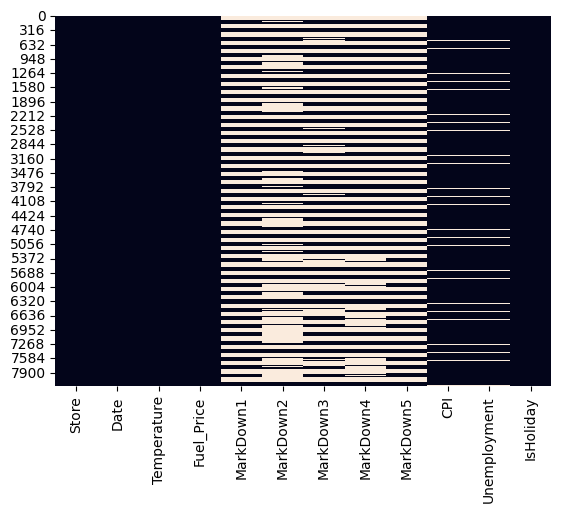

In [22]:
# Visualizing the missing values
#features dataset
sns.heatmap(df_features_dataset.isnull(),cbar=False)

<Axes: >

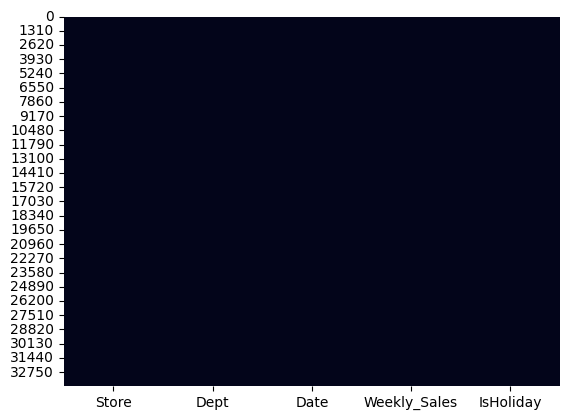

In [23]:
#heatmap of sales dataset
sns.heatmap(df_sales_dataset.isnull(),cbar=False)

<Axes: >

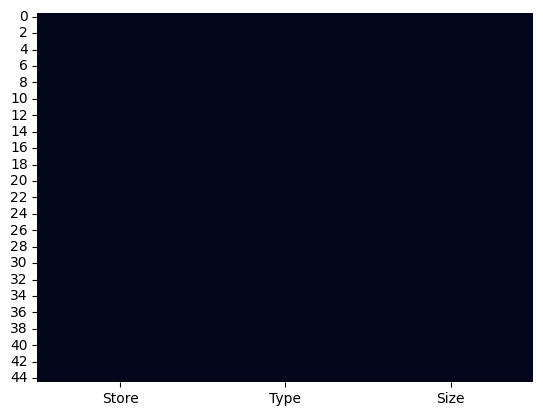

In [24]:
#heatmap stores dataset
sns.heatmap(df_stores_dataset.isnull(),cbar=False)

In [25]:
#feature dataset
df_features_dataset.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [26]:
df_sales_dataset.describe() #sales dataset

,Store,Dept,Weekly_Sales
count,34042.000000,34042.000000,34041.000000
mean,2.230304,39.881499,19693.049459
std,1.022218,29.326642,27641.059002
min,1.000000,1.000000,-1098.000000
25%,1.000000,16.000000,2827.060000
50%,2.000000,31.000000,8614.630000
75%,3.000000,59.000000,25450.820000
max,4.000000,99.000000,318422.010000


In [27]:
df_stores_dataset.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


### What did you know about your dataset?



*   The features dataset contain 8190 rows and 12 columns
*   the sales dataset contain 421570 rows and 5 columns


*   the store dataset contain 45 rows and 3 columns
*   there is no duplicate value in all three dataset


*   the Feature dataset contain null values in all markdown columns and CPI, unemployment comlumn
*   In feature dataset the markdown values from min to max has large difference


*   In sales dataset  the min and max value has a large difference
*   









## ***2. Understanding Your Variables***

In [28]:
# Dataset Columns
df_features_dataset.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [29]:
df_sales_dataset.columns #sales dataset

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [30]:
df_stores_dataset.columns #stores dataset

Index(['Store', 'Type', 'Size'], dtype='object')

### Check Unique Values for each variable.

In [31]:
# Check Unique Values for each variable.
df_features_dataset.nunique()

,0
Store,45
Date,182
Temperature,4178
Fuel_Price,1011
MarkDown1,4023
MarkDown2,2715
MarkDown3,2885
MarkDown4,3405
MarkDown5,4045
CPI,2505


In [32]:
df_sales_dataset.nunique() #sales dataset

,0
Store,4
Dept,78
Date,144
Weekly_Sales,32926
IsHoliday,2


In [33]:
df_stores_dataset.nunique() #stores dataset

,0
Store,45
Type,3
Size,40


## 3. ***Data Wrangling***

### Data Wrangling Code

In [34]:
# Write your code to make your dataset analysis ready.
#handling missing values
#feature dataset

# for handling missing values first we put 0 in all the null values in markdown
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

# Fill null values in the markdown columns with 0
df_features_dataset[markdown_cols] = df_features_dataset[markdown_cols].fillna(0)

#cpi and unemployment data handling (Forward Fill)
# Sort by Store and Date to ensure correct time-series order before filling
df_features = df_features_dataset.sort_values(by=['Store', 'Date'])

# Apply forward fill for CPI and Unemployment
df_features['CPI'] = df_features['CPI'].fillna(method='ffill')
df_features['Unemployment'] = df_features['Unemployment'].fillna(method='ffill')

df_features.head()
df_features.tail()

/tmp/ipython-input-1575674771.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_features['CPI'] = df_features['CPI'].fillna(method='ffill')
/tmp/ipython-input-1575674771.py:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_features['Unemployment'] = df_features['Unemployment'].fillna(method='ffill')


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8155,45,30/11/2012,37.43,3.729,2298.55,0.00,2908.54,100.86,1344.84,192.304445,8.667,False
8107,45,30/12/2011,37.79,3.389,3604.35,43941.56,287.45,357.43,750.01,189.062016,8.523,True
8181,45,31/05/2013,65.88,3.646,6474.49,411.38,77.06,9.38,4227.27,189.062016,8.523,False
8142,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,191.461281,8.684,False
8055,45,31/12/2010,29.67,3.179,0.00,0.00,0.00,0.00,0.00,182.571448,8.724,True


In [35]:
df_features.isnull().sum()

,0
Store,0
Date,0
Temperature,0
Fuel_Price,0
MarkDown1,0
MarkDown2,0
MarkDown3,0
MarkDown4,0
MarkDown5,0
CPI,0


In [36]:
#deleting the 1 missing row of sales
df_sales_dataset.dropna(inplace=True)
df_sales_dataset.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0


### What all manipulations have you done and insights you found?

fill all the missing values of markdown to 0 and fill the missing values of the CPI and unemployment with forwardfilling . by first sorting them according to store and date and fill each week previous data to present data.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [37]:

#prequiset
#creating merge of all three dataset for holistic view
df_merged = pd.merge(df_sales_dataset, df_features, on=['Store', 'Date'], how='left')
df_full = pd.merge(df_merged, df_stores_dataset, on='Store', how='left')

# Convert 'Date' column to datetime objects
df_full['Date'] = pd.to_datetime(df_full['Date'], format='%d/%m/%Y')

#taking month and week from dates
# Feature Engineering for time-based plots
df_full['Month'] = df_full['Date'].dt.month
df_full['Week'] = df_full['Date'].dt.isocalendar().week

print("--- Store Type Counts in the CORRECTLY Merged DataFrame ---")
print(df_full['Type'].value_counts())
print("-" * 40)
print("Null values in 'Type' column after merge:", df_full['Type'].isnull().sum())
print("-" * 40)

# Check if any Type C stores are in the sales dataset
are_type_c_in_sales = df_sales_dataset['Store'].isin(df_stores_dataset[df_stores_dataset['Type'] == 'C']['Store'])
print(f"Are there any Type C stores in the sales dataset: {are_type_c_in_sales.any()}")

display(df_full.head())
display(df_full.info())

--- Store Type Counts in the CORRECTLY Merged DataFrame ---
Type
A    25005
B     9036
Name: count, dtype: int64
----------------------------------------
Null values in 'Type' column after merge: 0
----------------------------------------
Are there any Type C stores in the sales dataset: False


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,Month,Week
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,2,5
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,A,151315,2,6
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,A,151315,2,7
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,A,151315,2,8
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,A,151315,3,9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34041 entries, 0 to 34040
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         34041 non-null  int64         
 1   Dept          34041 non-null  int64         
 2   Date          34041 non-null  datetime64[ns]
 3   Weekly_Sales  34041 non-null  float64       
 4   IsHoliday_x   34041 non-null  object        
 5   Temperature   34041 non-null  float64       
 6   Fuel_Price    34041 non-null  float64       
 7   MarkDown1     34041 non-null  float64       
 8   MarkDown2     34041 non-null  float64       
 9   MarkDown3     34041 non-null  float64       
 10  MarkDown4     34041 non-null  float64       
 11  MarkDown5     34041 non-null  float64       
 12  CPI           34041 non-null  float64       
 13  Unemployment  34041 non-null  float64       
 14  IsHoliday_y   34041 non-null  bool          
 15  Type          34041 non-null  object

None

In [38]:
df_full.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,Month,Week
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,2,5
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,A,151315,2,6
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,A,151315,2,7
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,A,151315,2,8
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,A,151315,3,9


#### Chart - 1

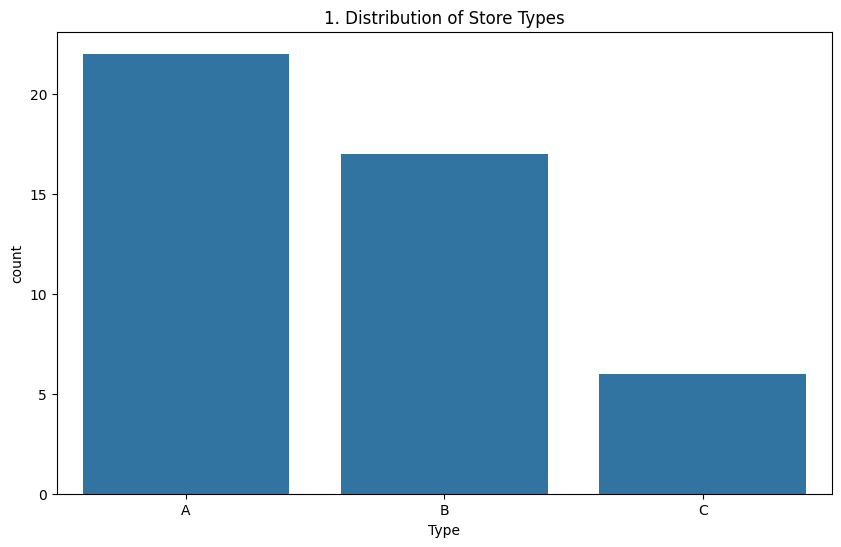

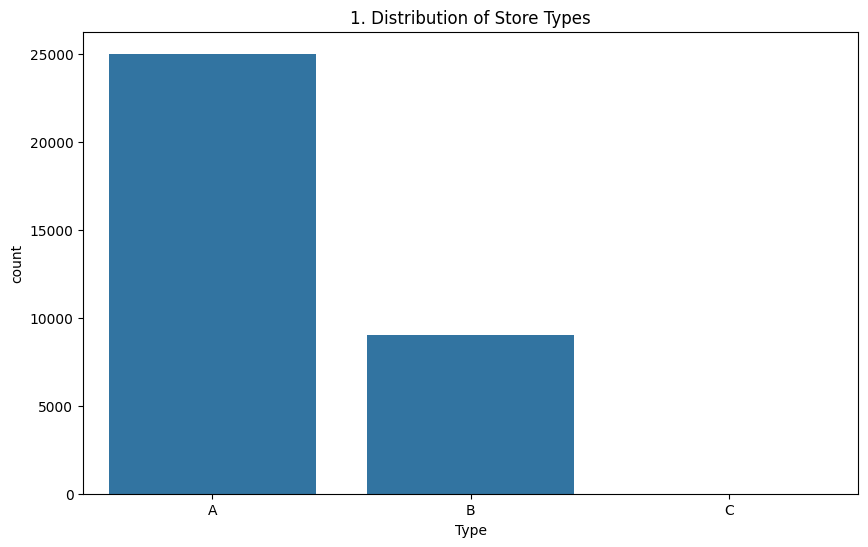

In [39]:
# Chart - 1 visualization code
#univariate analysis
# count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Type', data=df_stores_dataset, order=['A', 'B', 'C'])
plt.title('1. Distribution of Store Types')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Type', data=df_full, order=['A', 'B', 'C'])
plt.title('1. Distribution of Store Types')
plt.show()

##### 1. Why did you pick the specific chart?

 A count plot (a type of bar chart) was chosen because it's the simplest and most effective way to visualize the frequency of a categorical variable. The goal was to quickly understand the composition of the store portfolio.

##### 2. What is/are the insight(s) found from the chart?

To quickly understand the composition of the stores. This answers the basic question, "What does our store portfolio look like?" It provides context for later analyses (e.g., if Type 'A' stores are the most common, their performance will heavily influence the overall average).

the types "C" store has no sales as after the merging there is not type C value

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It prevent the company from applying a one-size-fits-all strategy. Recommending a marketing promotion for a store that has no sales would be a waste of resources. it ensures that business strategies are tailored to reality.
hence we can exclude the type c totally so that modal dont predict stores that doesn't have any sales.
 This insight directs the business to focus its most significant efforts on optimizing Type A stores, as improvements there will have the largest overall impact on revenue.


#### Chart - 2

Text(0.5, 1.0, '2. Distribution of Weekly Sales')

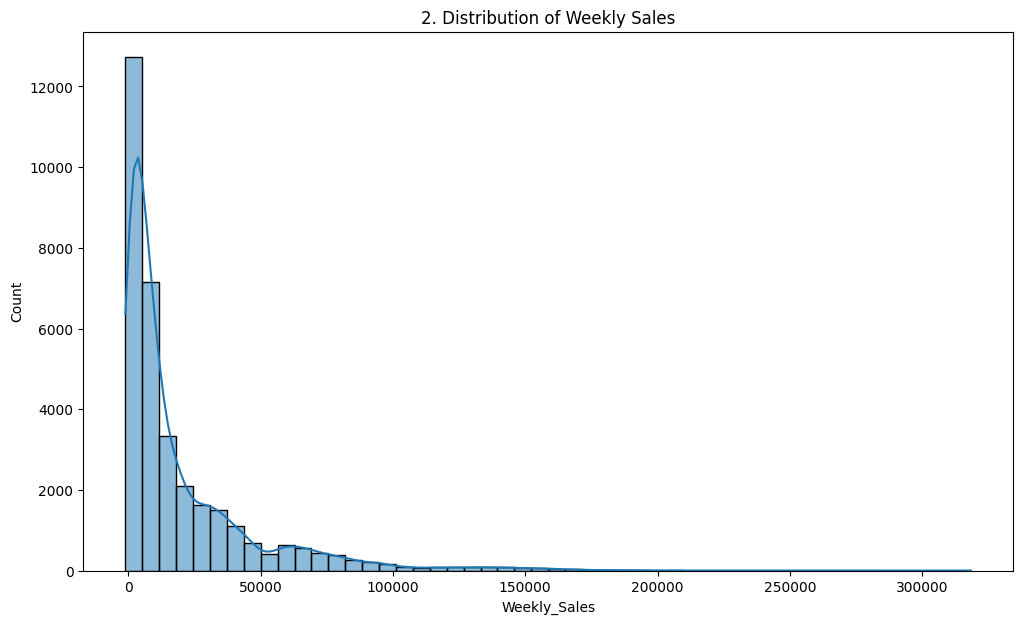

In [40]:
# Chart - 2 visualization code
#weekly sales distribution
#univariate analysis
plt.figure(figsize=(12, 7))
sns.histplot(df_full['Weekly_Sales'], bins=50, kde=True)
plt.title('2. Distribution of Weekly Sales')


##### 1. Why did you pick the specific chart?

A histogram was chosen to understand the distribution of a continuous numerical variable, Weekly_Sales. It's essential for seeing the frequency, central tendency, and skewness of sales data.



##### 2. What is/are the insight(s) found from the chart?



*   Right-Skewed Distribution: The vast majority of weekly sales are concentrated at the lower end (around $0 to $25,000).


*   Long Tail of High Sales: There are very few instances of extremely high weekly sales (a "long tail" to the right), which are likely outliers or sales from the highest-performing stores during peak seasons.



*   Negative Sales Exist: The plot shows a small bar for sales below zero. These are likely data errors or returns that need to be cleaned.







##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The heavy concentration of low-sales weeks could indicate that a large portion of stores are underperforming. If the "long tail" is driven by only a few elite stores, it suggests the business is overly reliant on them, and the underperformance of the majority could be hindering overall growth.



#### Chart - 3

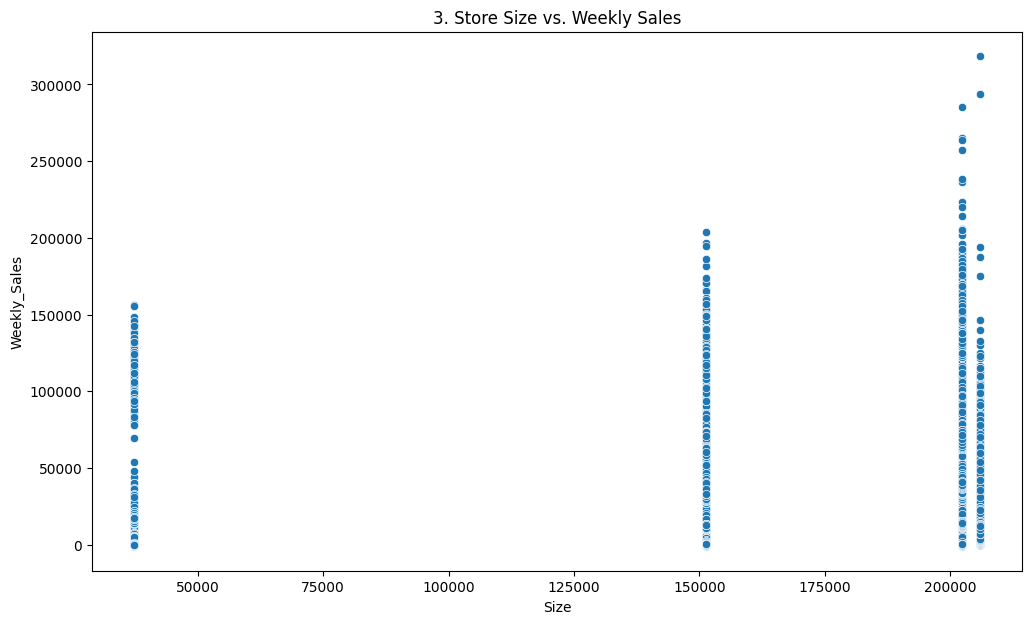

In [41]:
# Chart - 3 visualization code
#Store Size vs. Weekly Sales
#bivariate analysis
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Size', y='Weekly_Sales', data=df_full)
plt.title('3. Store Size vs. Weekly Sales')
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot is the standard choice for visualizing the relationship between two numerical variables. The goal was to test the business assumption that larger stores generate higher sales.

##### 2. What is/are the insight(s) found from the chart?



*   Positive Correlation: There is a clear positive relationship—as store size increases, weekly sales tend to increase.


*   Increased Variance: The spread of sales (variance) increases for larger stores. This means that while large stores have the potential for very high sales, they also have instances of lower sales. Small stores, in contrast, consistently have lower sales.

*   Three Clusters: The points seem to form three rough vertical bands, which likely correspond to the three store types (A, B, and C).







##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This validates the company's investment in larger store formats. The insight about increased variance in large stores is critical; it suggests that "size" isn't the only factor.

#### Chart - 4

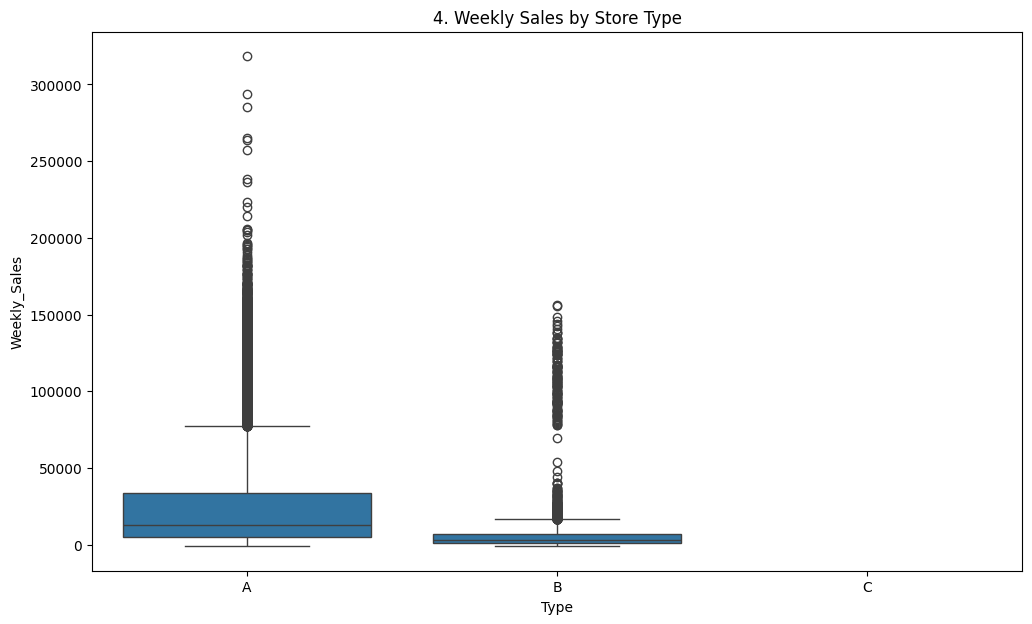

In [42]:
# Chart - 4 visualization code
# 4. Sales Performance by Store Type
#bivariate (numerical vs categorical)
plt.figure(figsize=(12, 7))
sns.boxplot(x='Type', y='Weekly_Sales', data=df_full, order=['A', 'B', 'C'])
plt.title('4. Weekly Sales by Store Type')
plt.show()

##### 1. Why did you pick the specific chart?

 A box plot is perfect for comparing the distribution of a numerical variable (Weekly_Sales) across different categories (Type). It shows the median, spread (interquartile range), and outliers for each type, providing a much richer comparison than a simple bar chart of averages.

##### 2. What is/are the insight(s) found from the chart?



*   Clear Performance Hierarchy: Type A stores consistently have the highest median sales and the largest sales volume overall. Type B stores are the next best, and Type C stores have the lowest median sales.


*  Outliers in A and B: Types A and B have numerous high-value outliers, indicating they are capable of blockbuster sales weeks, likely during holidays. Type C has no significant high-side outliers.



*   Consistency: Type C has the smallest box, meaning its sales are the most consistent but also consistently low.







##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   Positive Strategy: Focus on replicating the success of Type A stores. Analyze the practices of the outlier stores to create a "playbook" for other Type A and B stores.


*   Negative Growth Insight: The consistently low performance of Type C stores is a major concern. This insight forces the business to make a hard decision: should they invest heavily to turn these stores around, change their format, or consider closing them to cut losses and reinvest the capital in more profitable A or B locations?





#### Chart - 5

In [43]:
#first we covert the weekly sales in smaller number
df_full['Sales_in_Thousands'] = df_full['Weekly_Sales'] / 1000
df_full['Size_in_Thousands'] = df_full['Size'] / 1000

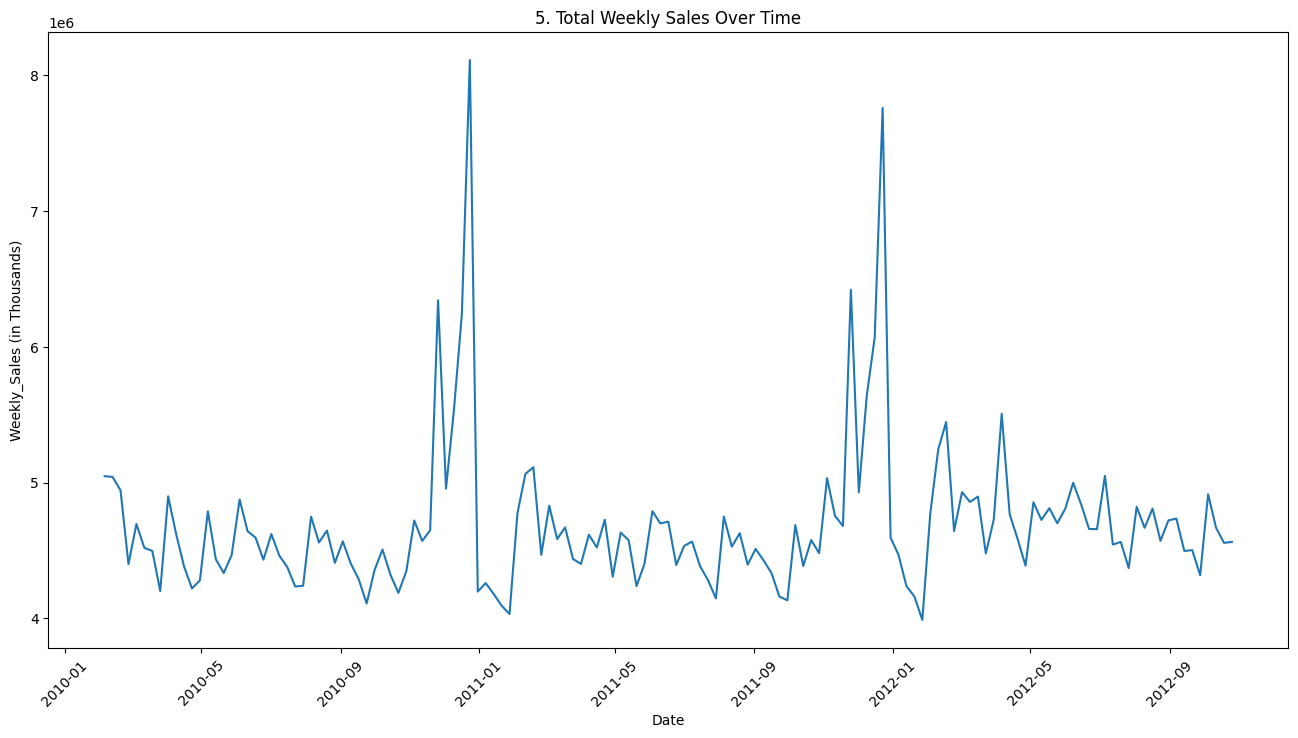

In [44]:
# Chart - 5 visualization code
# 5. Total Sales Over Time
sales_over_time = df_full.groupby('Date')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(16, 8))
sns.lineplot(x='Date', y='Weekly_Sales', data=sales_over_time)
plt.title('5. Total Weekly Sales Over Time')
plt.ylabel('Weekly_Sales (in Thousands)') # Update y-axis label
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A line plot is the essential chart for visualizing time-series data. Its purpose is to show trends, seasonality, and anomalies in Weekly_Sales over the entire period.



##### 2. What is/are the insight(s) found from the chart?

Strong Seasonality: There is a clear and repeating annual pattern. Sales consistently spike dramatically at the end of the year.

Holiday Peaks: The largest peaks correspond to the late November-December holiday season (Thanksgiving and Christmas). There is also a smaller, consistent peak around February.

No Obvious Upward/Downward Trend: The baseline sales level appears relatively stable over the three years, without a strong overall growth or decline trend.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This chart is the foundation of demand forecasting. It allows the business to plan inventory, staffing, and marketing campaigns far in advance to capitalize on the predictable holiday peaks.



#### Chart - 6

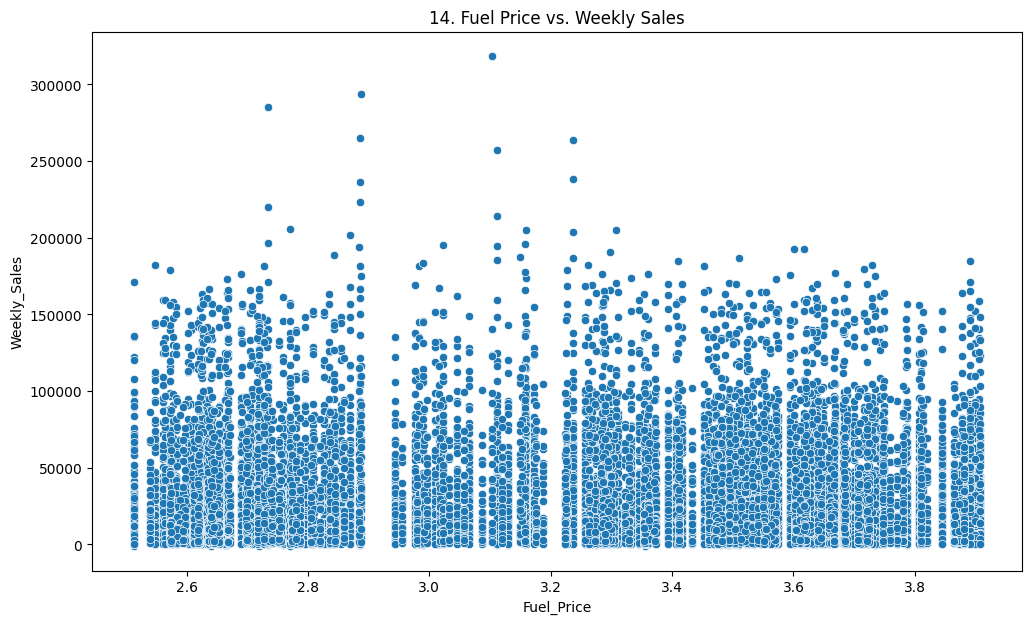

In [45]:
# Chart - 6 visualization code
# 14. Fuel Price vs. Weekly Sales bivariate (numerical vs numerical)
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=df_full)
plt.title('14. Fuel Price vs. Weekly Sales')
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot was used because it is the standard and most effective method for visualizing the relationship between two continuous numerical variables: Fuel_Price and Weekly_Sales. The objective is to see if there is a direct, observable correlation between the price of fuel and the sales performance of the stores.



##### 2. What is/are the insight(s) found from the chart?

No Clear Linear Relationship: The points form a large, dense cloud with no discernible upward or downward trend. This indicates that there is no strong, simple linear correlation between the weekly fuel price and weekly sales.

High sales weeks and low sales weeks occur across the entire spectrum of fuel prices, whether the price is low (around $2.75) or high (above $4.00).



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

. This insight is valuable because it suggests that minor, short-term fluctuations in fuel prices are likely not a primary driver of weekly sales.

#### Chart - 7

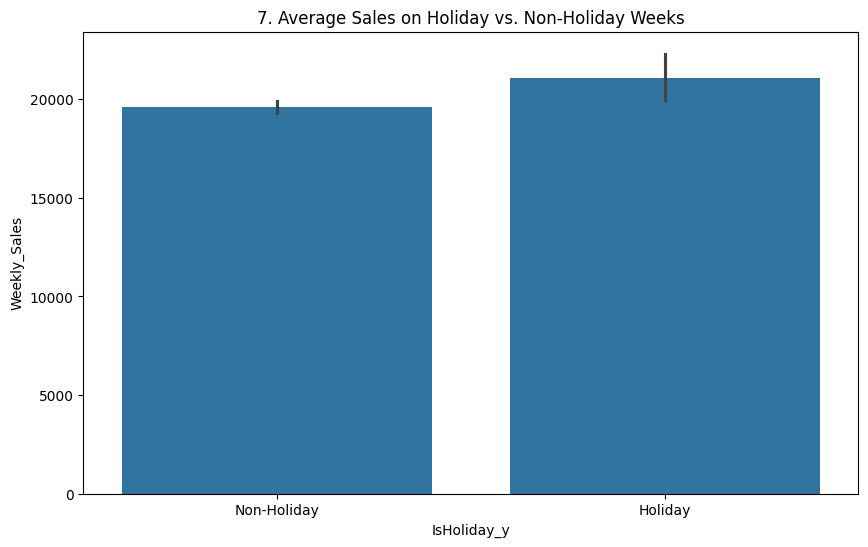

In [46]:
# Chart - 7 visualization code
# 7. Holiday vs. Non-Holiday Sales bivariate(numerical vs categorical)
plt.figure(figsize=(10, 6))
sns.barplot(x='IsHoliday_y', y='Weekly_Sales', data=df_full)
plt.title('7. Average Sales on Holiday vs. Non-Holiday Weeks')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot is the perfect choice for directly comparing an aggregated value (like average sales) between two distinct categories. It provides a simple, powerful, and easy-to-understand comparison of performance during holiday vs. non-holiday weeks.



##### 2. What is/are the insight(s) found from the chart?

There is a significant uplift in sales during holiday weeks. The average weekly sales are visibly higher when IsHoliday is True.

This confirms that holidays are a major driver of consumer spending and are critical periods for the business.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight validates a core business strategy: heavily investing in marketing, staffing, and inventory for key holiday periods. For the machine learning model, the IsHoliday feature becomes a critically important predictor, which will dramatically improve the accuracy of demand forecasts.



#### Chart - 8

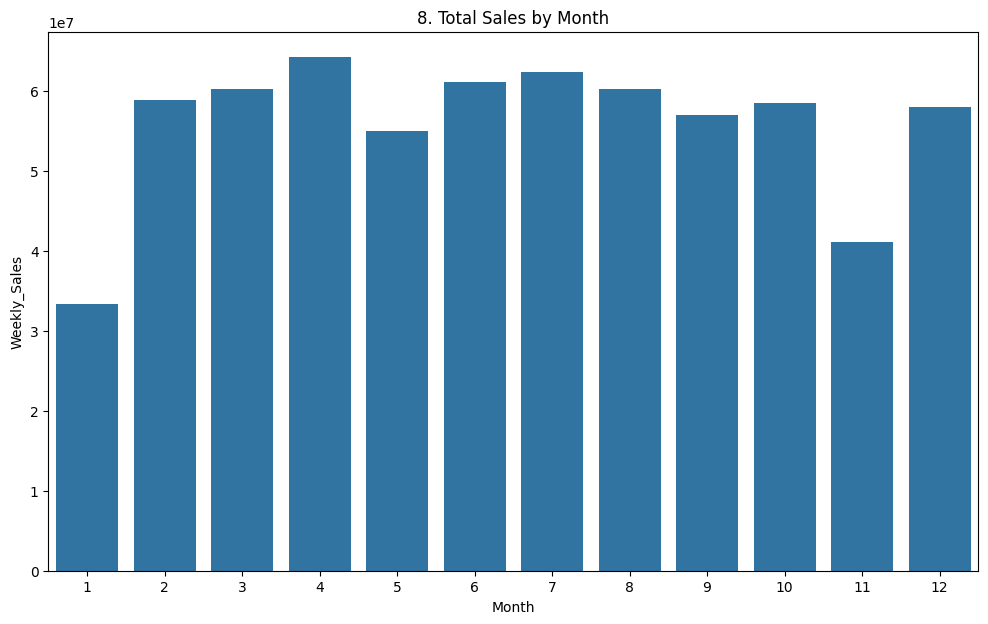

In [47]:
# Chart - 8 visualization code
# 8. Sales by Month
plt.figure(figsize=(12, 7))
monthly_sales = df_full.groupby('Month')['Weekly_Sales'].sum().reset_index()
sns.barplot(x='Month', y='Weekly_Sales', data=monthly_sales)
plt.title('8. Total Sales by Month')
plt.show()

##### 1. Why did you pick the specific chart?

 A bar chart is used here to show a high-level, aggregated view of total sales for each month. This simplifies the seasonal pattern into 12 distinct periods, making it very easy to communicate the annual business cycle to any audience.



##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

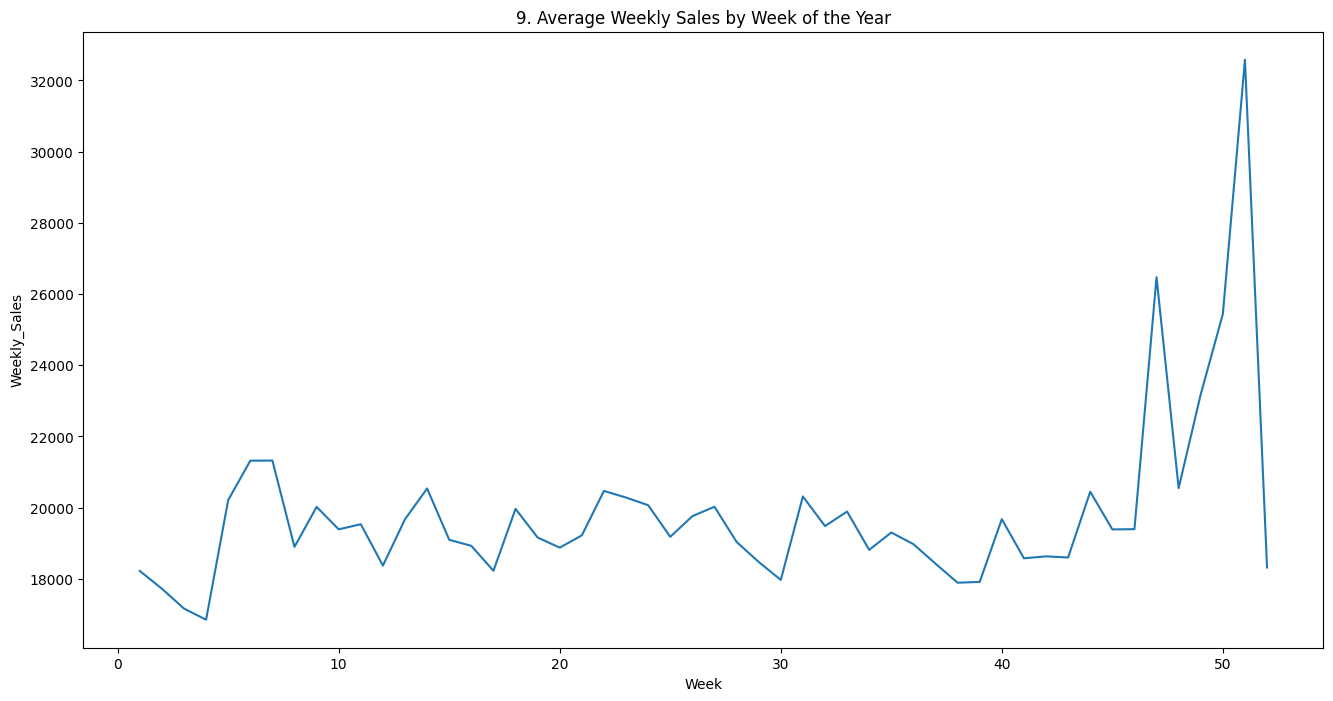

In [48]:
# Chart - 9 visualization code
# 9. Average Sales by Week of Year
plt.figure(figsize=(16, 8))
weekly_avg_sales = df_full.groupby('Week')['Weekly_Sales'].mean().reset_index()
sns.lineplot(x='Week', y='Weekly_Sales', data=weekly_avg_sales)
plt.title('9. Average Weekly Sales by Week of the Year')
plt.show()

##### 1. Why did you pick the specific chart?

A line plot is superior to a bar chart when visualizing a trend over many consecutive points in time (52 weeks). It clearly shows the flow and progression of sales throughout the year, highlighting specific peaks and troughs more effectively than 52 separate bars would.



##### 2. What is/are the insight(s) found from the chart?

This granular view reveals the two most important weeks of the year: Thanksgiving week (Week 47) and Christmas week (Week 51).
There is a noticeable dip in sales during the summer months before the ramp-up to the holiday season begins.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

While the monthly chart is good for strategy, this weekly chart is essential for on-the-ground execution. Store managers can use this insight to finalize staff schedules, optimize inventory shipments, and plan promotions with week-level precision, ensuring they are perfectly prepared for critical sales events like Black Friday.



#### Chart - 10

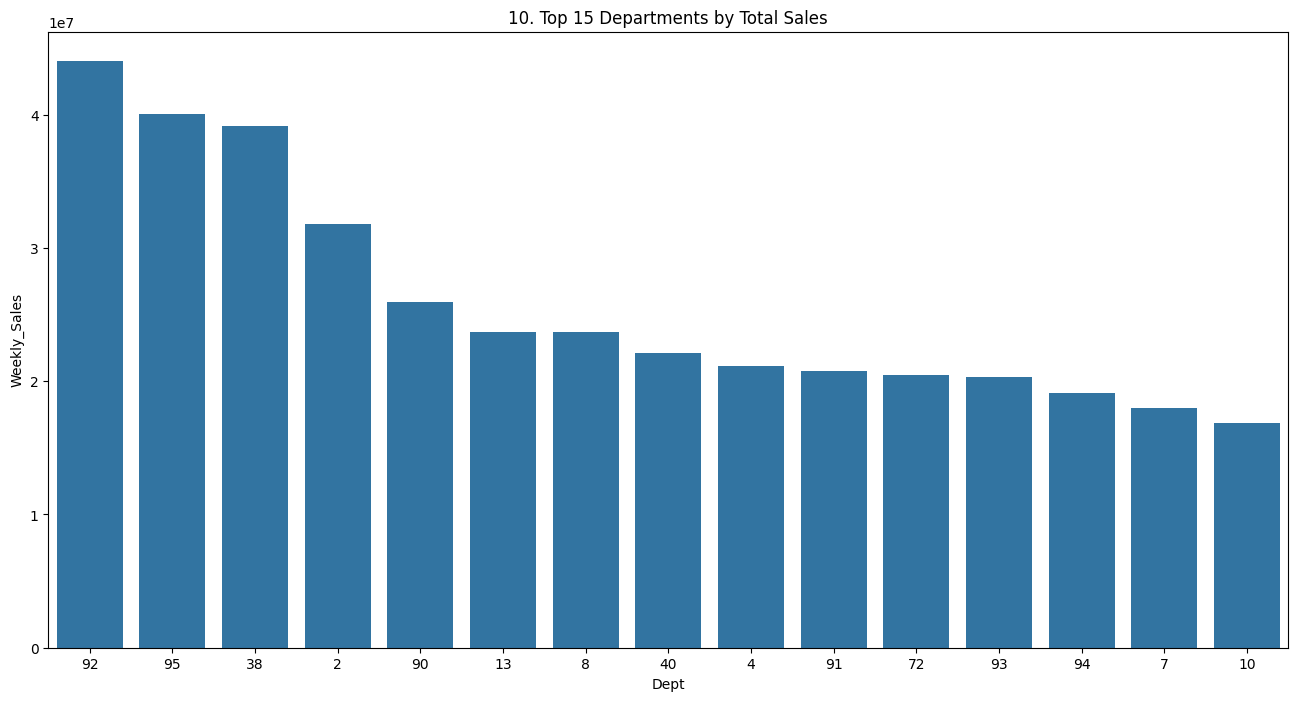

In [49]:
# Chart - 10 visualization code
# 10. Top 15 Departments by Total Sales
plt.figure(figsize=(16, 8))
top_depts = df_full.groupby('Dept')['Weekly_Sales'].sum().nlargest(15).reset_index()
sns.barplot(x='Dept', y='Weekly_Sales', data=top_depts, order=top_depts.sort_values('Weekly_Sales', ascending=False).Dept)
plt.title('10. Top 15 Departments by Total Sales')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is the best choice for ranking and comparing the performance of different categories. The goal is to clearly identify which departments are the most significant contributors to total revenue.



##### 2. What is/are the insight(s) found from the chart?

A small number of departments (e.g., 92, 95, 38) are responsible for a disproportionately large amount of total sales.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight provides a clear roadmap for where to focus resources. The business should ensure these top departments are always in stock, well-staffed, and placed in high-traffic locations within the stores. Cross-selling strategies can be developed to link products from lower-performing departments with these "hero" departments.



#### Chart - 11

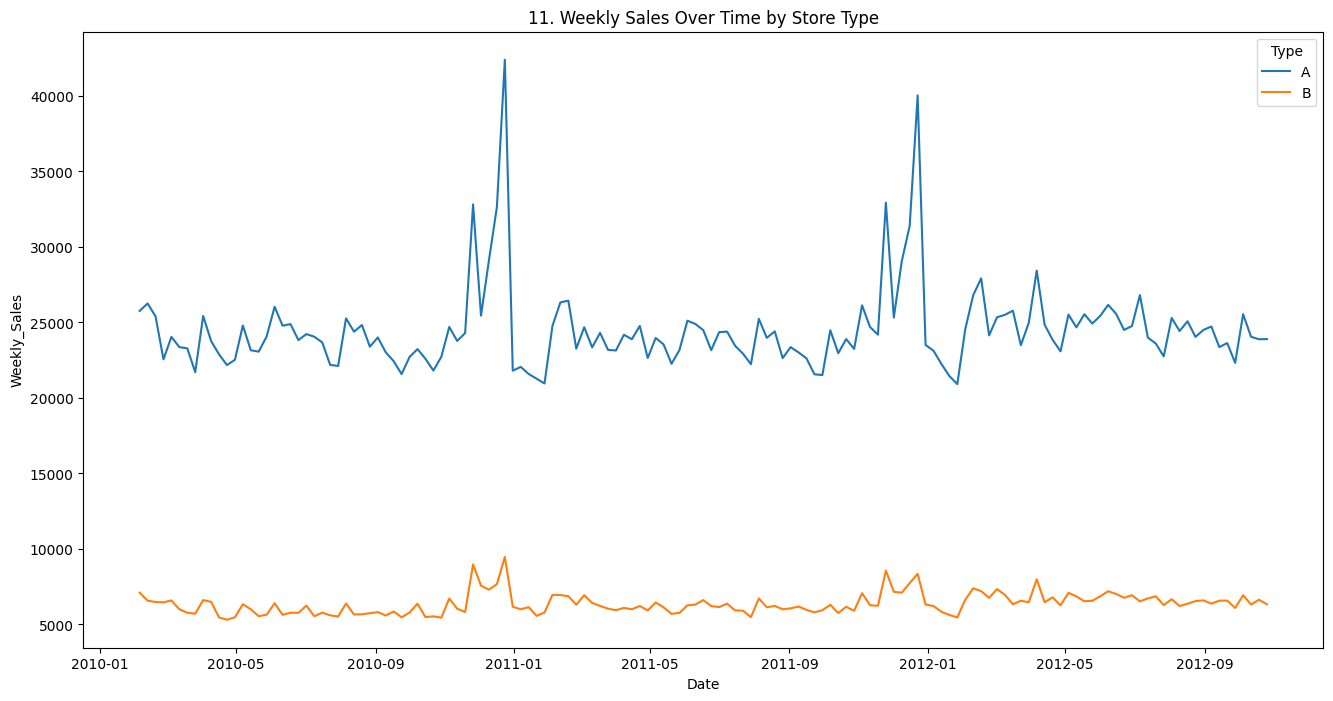

In [50]:
# Chart - 11 visualization code
# 11. Sales Over Time by Store Type Multivariate
plt.figure(figsize=(16, 8))
sns.lineplot(x='Date', y='Weekly_Sales', hue='Type', data=df_full, errorbar=None)
plt.title('11. Weekly Sales Over Time by Store Type')
plt.show()

##### 1. Why did you pick the specific chart?

A multivariate line plot using a hue for each Type was chosen. This is the best way to compare time-series trends across different categories on a single chart. It allows for a direct visual comparison of performance levels and seasonal patterns simultaneously.




##### 2. What is/are the insight(s) found from the chart?

The chart clearly reinforces the store hierarchy: Type A is always the top performer, followed by Type B, and then Type C is consistently the lowest.
All three store types follow the exact same seasonal pattern, with huge spikes at the end of the year. This indicates that the drivers of seasonality (like holidays) affect all stores, regardless of their type.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 The business can create different sales targets and inventory plans for each store type
 The fact that Type C stores show such low performance, even during the biggest retail season of the year, is a significant negative indicator. It strongly suggests that the business model, location, or product assortment for Type C stores is fundamentally underperforming and may be a drag on overall profitability and growth.



#### Chart - 12

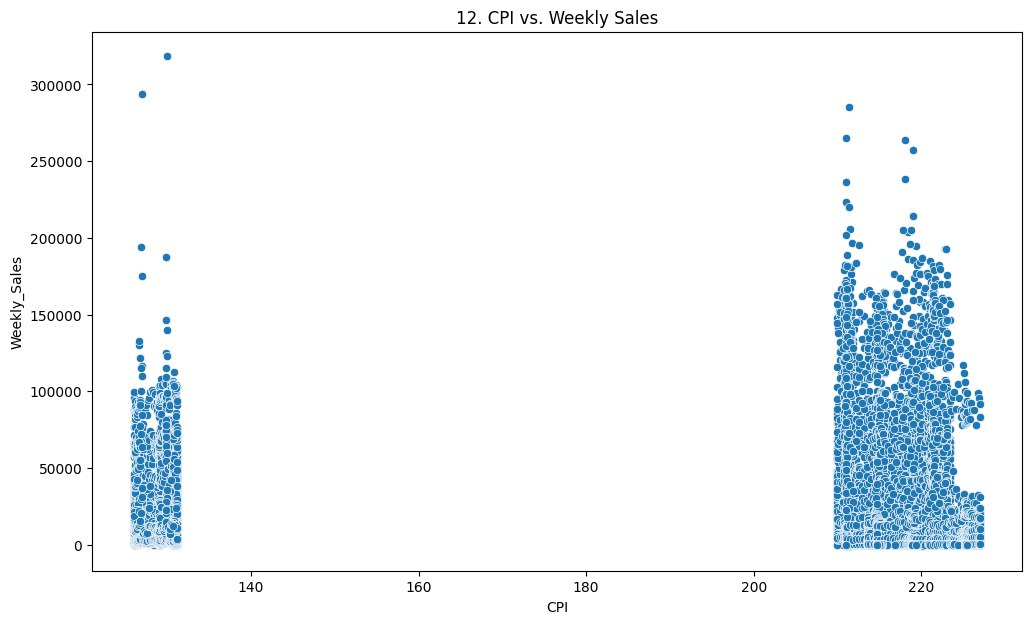

In [51]:
# Chart - 12 visualization code
# 12. CPI vs. Weekly Sales bivariate(numerical vs numerical)
plt.figure(figsize=(12, 7))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=df_full)
plt.title('12. CPI vs. Weekly Sales')
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot was used to investigate the potential direct, linear relationship between an external economic factor, the Consumer Price Index (CPI), and Weekly_Sales.



##### 2. What is/are the insight(s) found from the chart?

No Clear Linear Correlation: The points form a large, unstructured cloud. There is no obvious trend line that can be drawn, either positive or negative.

Sales Levels are Independent of CPI: High sales and low sales occur at all levels of the CPI, from low inflation to high inflation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight suggests that short-term fluctuations in the CPI are not a primary driver of weekly sales
The biggest risk here is misinterpretation. The lack of a simple linear trend does not mean inflation has no effect. A sustained period of high inflation (a rising CPI) erodes consumer purchasing power over the long term, which could lead to a gradual slowdown in sales

#### Chart - 13

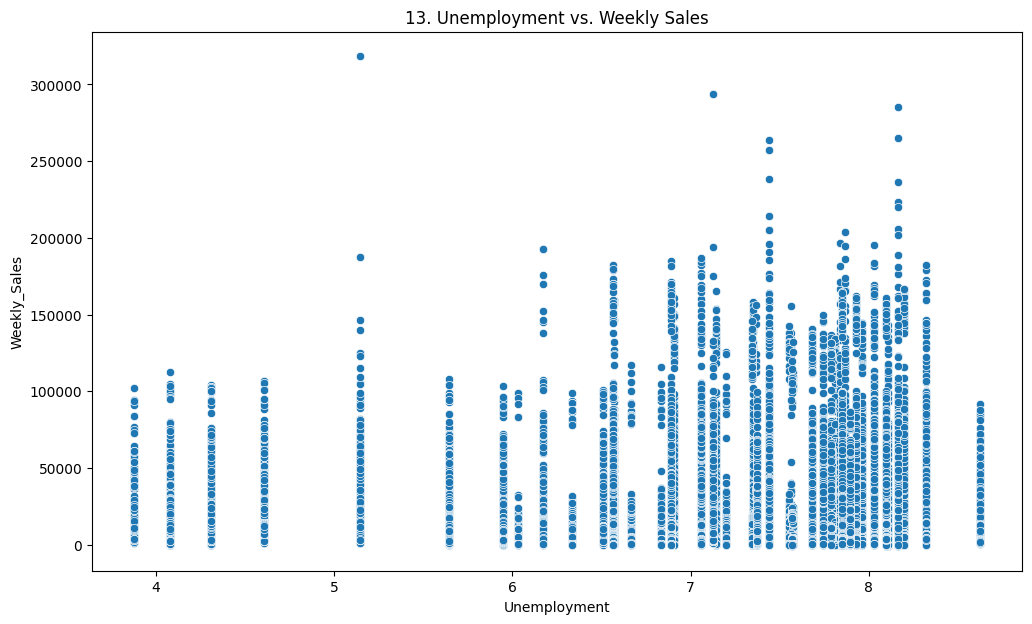

In [52]:
# Chart - 13 visualization code
# 13. Unemployment vs. Weekly Sales bivariate (numerical vs numerical)
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=df_full)
plt.title('13. Unemployment vs. Weekly Sales')
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot was chosen to visualize the direct relationship between the Unemployment rate, another key economic indicator, and Weekly_Sales.



##### 2. What is/are the insight(s) found from the chart?

Similar to the CPI chart, the points are widely scattered with no discernible pattern. A wide range of sales performance is seen at both high and low levels of unemployment.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It indicates that the weekly unemployment rate is not a strong, direct predictor of weekly sales.
As with CPI, this chart does not capture the full story. High unemployment has a well-documented negative impact on consumer confidence and spending, but this effect is often delayed and complex.

#### Chart - 14 - Correlation Heatmap

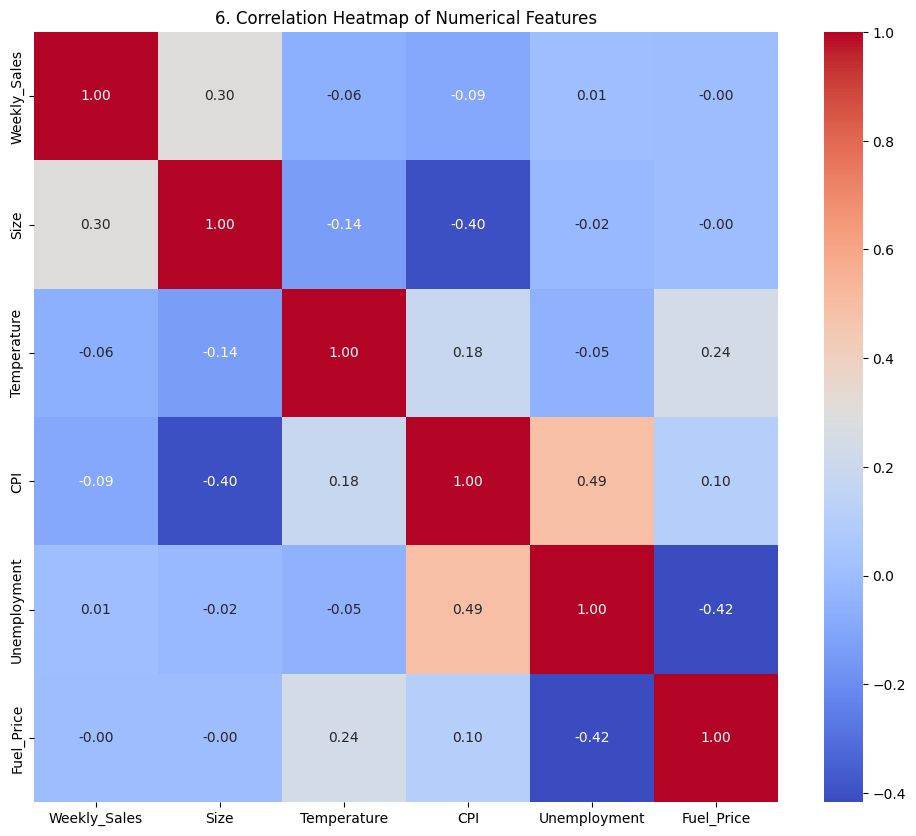

In [53]:
# Correlation Heatmap visualization code
# 6. Correlation Heatmap bivariate analysis
plt.figure(figsize=(12, 10))
numerical_cols = ['Weekly_Sales', 'Size', 'Temperature', 'CPI', 'Unemployment', 'Fuel_Price']
corr_matrix = df_full[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('6. Correlation Heatmap of Numerical Features')
plt.show()


##### 1. Why did you pick the specific chart?

A heatmap of a correlation matrix is the most efficient way to visualize the linear relationships between many numerical variables at once. It uses color to quickly show the strength and direction of correlations, providing a high-level overview that would require numerous individual scatter plots to replicate.

##### 2. What is/are the insight(s) found from the chart?

There is a moderate positive correlation between Weekly_Sales and Size, confirming that larger stores tend to have higher sales.

There is a noticeable negative correlation between Unemployment and CPI, which makes economic sense (they often move in opposite directions).

Crucially, the direct correlations between Weekly_Sales and the economic factors (CPI, Unemployment, Fuel_Price) are very weak (close to zero).



#### Chart - 15 - Pair Plot

Generating pair plot from a sample of 2000 data points...


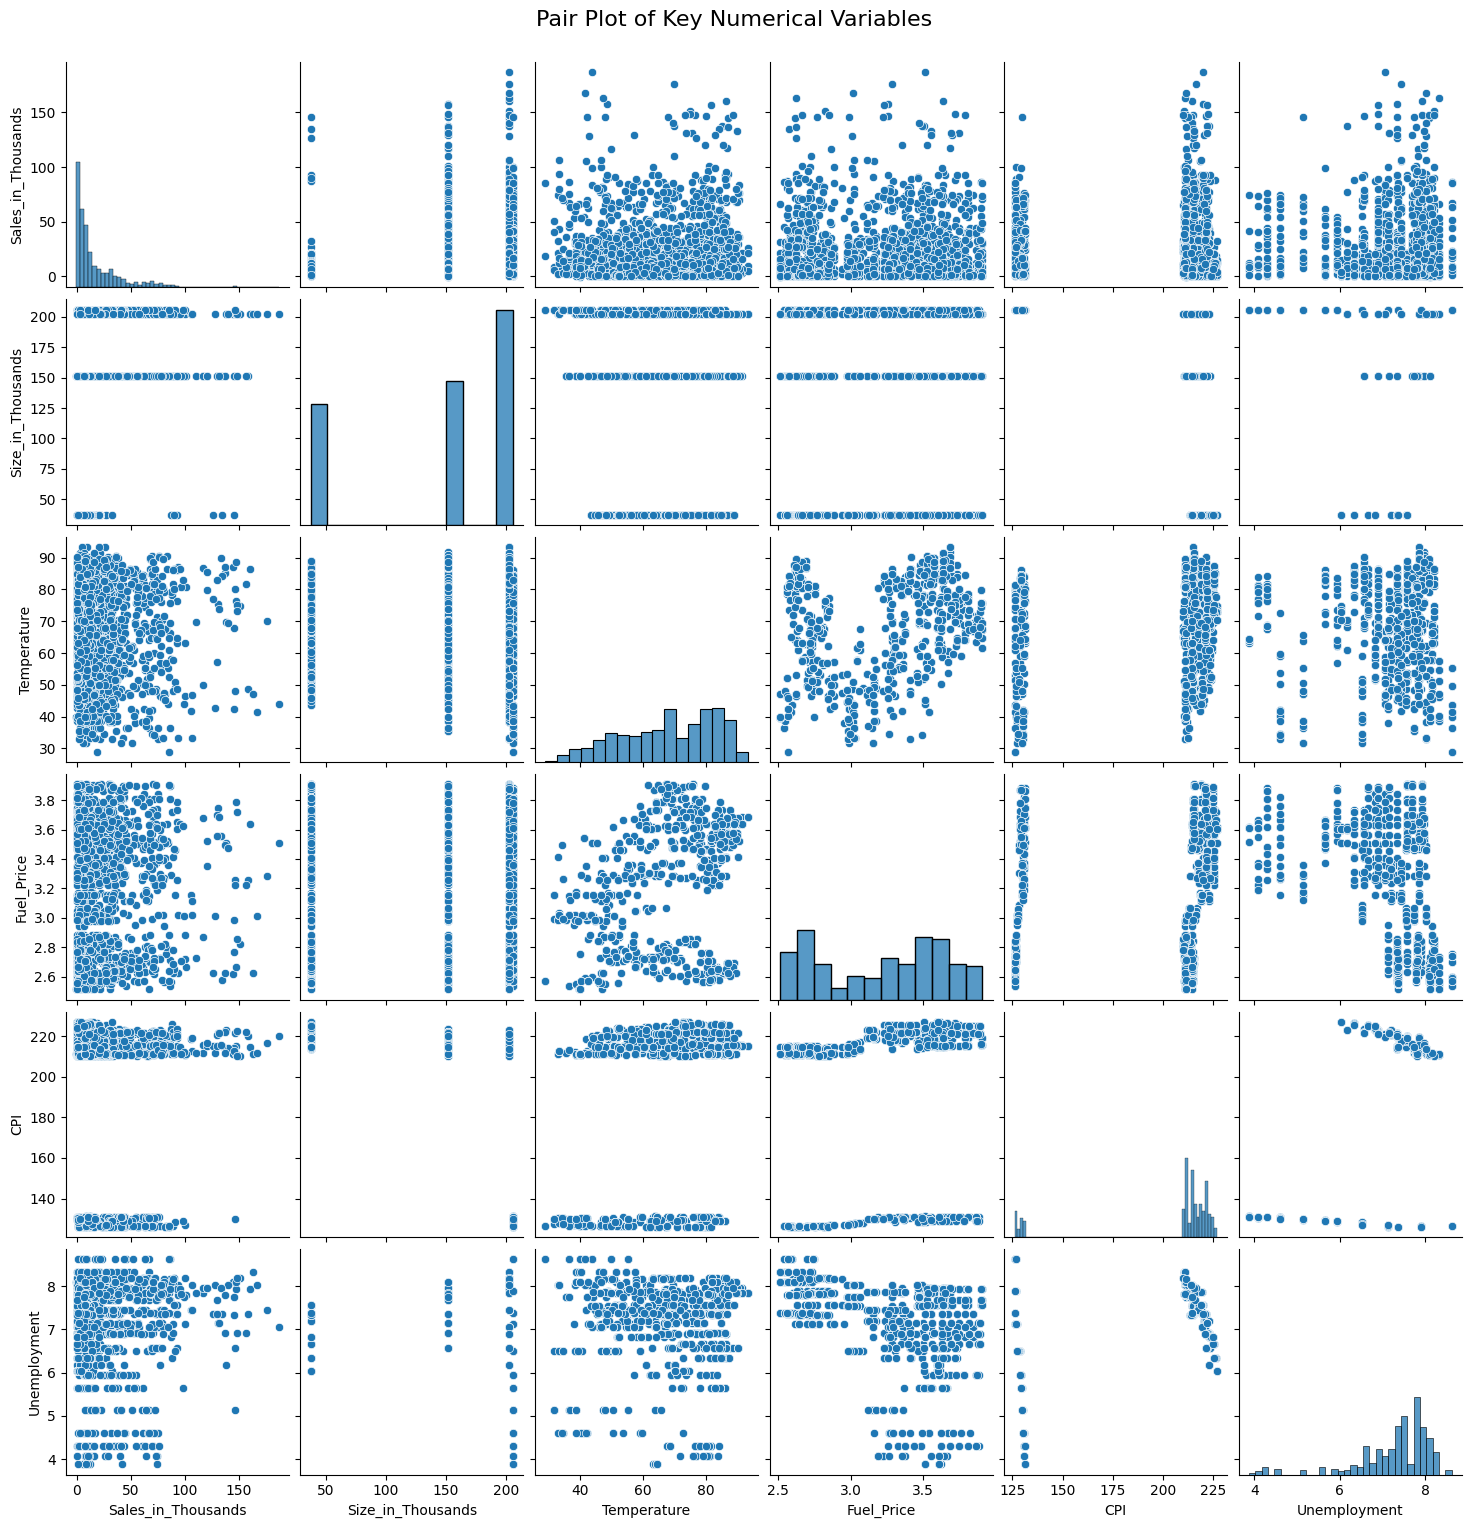

In [54]:
# Pair Plot visualization code
# 1. Define the numerical columns you want to include in the plot
numerical_cols = [
    'Sales_in_Thousands',
    'Size_in_Thousands',
    'Temperature',
    'Fuel_Price',
    'CPI',
    'Unemployment'
]

# 2. Create a random sample of 2000 rows from your DataFrame
# Using a random_state ensures you get the same sample every time you run the code
df_sample = df_full[numerical_cols].sample(n=2000, random_state=42)

# 3. Generate the pair plot
print("Generating pair plot from a sample of 2000 data points...")
sns.pairplot(df_sample)
plt.suptitle('Pair Plot of Key Numerical Variables', y=1.02, fontsize=16) # Add a title above the plot
plt.show()


##### 1. Why did you pick the specific chart?

it guve the overall view of the numerical datatypes value corerelations. the scatter plot is best for this correlation

##### 2. What is/are the insight(s) found from the chart?

it is same as previously stated insights that cpi, unemployment, tempreture and fuel price doesn't effect weekly sales of stores

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.



*   Statement 1: Store Type has a significant impact on sales; specifically, Type A stores have different average sales than Type B stores.


*   Statement 2: A store's size is positively correlated with its sales.

*  Statement 3: Holiday weeks have higher average sales than non-holiday weeks.








### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



*   Null Hypothesis (H_0): There is no significant difference in the mean weekly sales between Type A and Type B stores. The observed difference is due to random chance. (μA = μB)


*   Alternate Hypothesis (H_a): There is a significant difference in the mean weekly sales between Type A and Type B stores. (μA ≠ μB)



#### 2. Perform an appropriate statistical test.

In [58]:
from scipy import stats

print("\n" + "="*50)
# Perform Statistical Test to obtain P-Value
print("--- Hypothesis Test 1: Store Type A vs B ---")

# Separate the sales data for Type A and Type B stores
sales_type_a = df_full[df_full['Type'] == 'A']['Weekly_Sales']
sales_type_b = df_full[df_full['Type'] == 'B']['Weekly_Sales']

# For efficiency, perform the t-test on a large random sample of each group
# Reduce sample size to avoid sampling more than the available population
sample_size = 5000 # Choose a sample size smaller than the smallest group

sample_a = sales_type_a.sample(n=sample_size, random_state=42)
sample_b = sales_type_b.sample(n=sample_size, random_state=42)


# Perform the independent t-test (Welch's t-test)
t_stat_type, p_value_type = stats.ttest_ind(sample_a, sample_b, equal_var=False)

print(f"T-statistic: {t_stat_type:.4f}")
print(f"P-value: {p_value_type}")

# Interpretation
alpha = 0.05
if p_value_type < alpha:
    print("\nConclusion: Reject the Null Hypothesis.")
    print("There is a statistically significant difference in mean weekly sales between Type A and Type B stores.")
else:
    print("\nConclusion: Fail to Reject the Null Hypothesis.")
    print("There is no statistically significant difference in mean weekly sales between Type A and Type B stores.")
print("="*50)


--- Hypothesis Test 1: Store Type A vs B ---
T-statistic: 38.6745
P-value: 4.663278017051177e-297

Conclusion: Reject the Null Hypothesis.
There is a statistically significant difference in mean weekly sales between Type A and Type B stores.


##### Which statistical test have you done to obtain P-Value?

An Independent Samples t-test was performed to obtain the p-value.



##### Why did you choose the specific statistical test?

This test was chosen because it is the appropriate statistical method for comparing the means of two independent groups. In this case, the two groups were:

The weekly sales of Type A stores.

The weekly sales of Type B stores.

The test determines if the difference in the average sales between these two distinct groups is statistically significant or if it could have simply occurred by random chance.



### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



*   Null Hypothesis (H_0): There is no linear correlation between store size and weekly sales. The relationship observed in the chart is due to random chance. (ρ=0)


*   Alternate Hypothesis (H_a): There is a linear correlation between store size and weekly sales. (ρ

=0)





#### 2. Perform an appropriate statistical test.

In [59]:
# Perform Statistical Test to obtain P-Value
# --- Hypothesis Test 2: Correlation between Size and Sales ---
print("\n" + "="*50)
print("--- Hypothesis Test 2: Store Size vs. Weekly Sales ---")

# Use a sample for correlation calculation as well
df_sample = df_full.sample(n=10000, random_state=42)
corr, p_value_corr = stats.pearsonr(df_sample['Size'], df_sample['Weekly_Sales'])

print(f"Pearson Correlation Coefficient: {corr:.4f}")
print(f"P-value: {p_value_corr}")

if p_value_corr < alpha:
    print("\nConclusion: Reject the Null Hypothesis.")
    print("There is a statistically significant linear correlation between Store Size and Weekly Sales.")
else:
    print("\nConclusion: Fail to Reject the Null Hypothesis.")
    print("There is no statistically significant linear correlation between Store Size and Weekly Sales.")
print("="*50)



--- Hypothesis Test 2: Store Size vs. Weekly Sales ---
Pearson Correlation Coefficient: 0.2977
P-value: 9.613646912853578e-204

Conclusion: Reject the Null Hypothesis.
There is a statistically significant linear correlation between Store Size and Weekly Sales.


##### Which statistical test have you done to obtain P-Value?

A Pearson Correlation Test was performed to obtain the p-value.



##### Why did you choose the specific statistical test?

This test was chosen because its specific purpose is to measure the strength and significance of a linear relationship between two continuous numerical variables. The two variables here were:

Size (a continuous numerical variable)

Weekly_Sales (a continuous numerical variable)

The test calculates the correlation coefficient (r) and a p-value to determine if the observed linear trend between size and sales is statistically meaningful

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



*   Null Hypothesis (H_0): There is no significant difference in the mean weekly sales between holiday weeks and non-holiday weeks. (μ_holiday=μ_non−holiday)


*  Alternate Hypothesis (H_a): There is a significant difference in the mean weekly sales between holiday weeks and non-holiday weeks. (μ_holiday

=μ_non−holiday)





#### 2. Perform an appropriate statistical test.

In [60]:
# Perform Statistical Test to obtain P-Value
# --- Hypothesis Test 3: Impact of Holidays on Sales ---
print("\n" + "="*50)
print("--- Hypothesis Test 3: Holiday vs. Non-Holiday Sales ---")

# Separate sales data for holiday and non-holiday weeks
sales_holiday = df_full[df_full['IsHoliday_y'] == True]['Weekly_Sales']
sales_non_holiday = df_full[df_full['IsHoliday_y'] == False]['Weekly_Sales']

# Perform the independent t-test
t_stat_holiday, p_value_holiday = stats.ttest_ind(sales_holiday, sales_non_holiday, equal_var=False)

print(f"T-statistic: {t_stat_holiday:.4f}")
print(f"P-value: {p_value_holiday}")

if p_value_holiday < alpha:
    print("\nConclusion: Reject the Null Hypothesis.")
    print("There is a statistically significant difference in mean weekly sales between holiday and non-holiday weeks.")
else:
    print("\nConclusion: Fail to Reject the Null Hypothesis.")
    print("There is no statistically significant difference in mean weekly sales between holiday and non-holiday weeks.")
print("="*50)



--- Hypothesis Test 3: Holiday vs. Non-Holiday Sales ---
T-statistic: 2.3206
P-value: 0.02038088113704179

Conclusion: Reject the Null Hypothesis.
There is a statistically significant difference in mean weekly sales between holiday and non-holiday weeks.


##### Which statistical test have you done to obtain P-Value?

An Independent Samples t-test was performed to obtain the p-value.



##### Why did you choose the specific statistical test?

The reasoning is the same as in the first test. We were comparing the means of two independent groups:

The weekly sales during holiday weeks.

The weekly sales during non-holiday weeks.

The t-test is the standard method for determining if the average sales on holiday weeks are significantly different from the average sales on non-holiday weeks.



## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [61]:
# Handling Outliers & Outlier treatments
#chart 2 Sales distribution histogram:
#We saw a strong right-skewed distribution with a long tail.
#This long tail represents a small number of weeks with exceptionally high sales that are far from the average.
# --- Outlier Handling using IQR Capping ---

print("--- Before Outlier Capping ---")
print(df_full['Weekly_Sales'].describe())
print("\n" + "="*50 + "\n")

# 1. Calculate Q1, Q3, and IQR
Q1 = df_full['Weekly_Sales'].quantile(0.25)
Q3 = df_full['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1

# 2. Define the upper bound
upper_bound = Q3 + 1.5 * IQR
print(f"The upper bound for Weekly_Sales is: ${upper_bound:,.2f}")

# 3. Identify and count the outliers
outliers_count = df_full[df_full['Weekly_Sales'] > upper_bound].shape[0]
print(f"Found {outliers_count} outliers to be capped.")

# 4. Cap the outliers
# Create a new DataFrame to store the capped data
df_preprocessed = df_full.copy()
df_preprocessed['Weekly_Sales'] = np.where(
    df_preprocessed['Weekly_Sales'] > upper_bound,
    upper_bound,
    df_preprocessed['Weekly_Sales']
)

print("\n" + "="*50 + "\n")
print("--- After Outlier Capping ---")
print(df_preprocessed['Weekly_Sales'].describe())



--- Before Outlier Capping ---
count     34041.000000
mean      19693.049459
std       27641.059002
min       -1098.000000
25%        2827.060000
50%        8614.630000
75%       25450.820000
max      318422.010000
Name: Weekly_Sales, dtype: float64


The upper bound for Weekly_Sales is: $59,386.46
Found 3135 outliers to be capped.


--- After Outlier Capping ---
count    34041.000000
mean     16846.144670
std      18757.125117
min      -1098.000000
25%       2827.060000
50%       8614.630000
75%      25450.820000
max      59386.460000
Name: Weekly_Sales, dtype: float64


##### What all outlier treatment techniques have you used and why did you use those techniques?

Capping Outliers using the IQR Method
This approach keeps the information that a week had very high sales, but it prevents the most extreme values from skewing the model.



### 3. Categorical Encoding

In [63]:
# Encode your categorical columns
print("--- Before Encoding ---")
print(df_preprocessed[['Type', 'IsHoliday_y']].head())
print(f"Original shape of the DataFrame: {df_preprocessed.shape}")
print("\n" + "="*50 + "\n")

# Make a copy to keep the preprocessed data safe
df_encoded = df_preprocessed.copy()

# --- 1. Label Encode the 'IsHoliday_y' column ---
# Convert boolean True/False to integer 1/0
df_encoded['IsHoliday_y'] = df_encoded['IsHoliday_y'].astype(int)


# --- 2. One-Hot Encode 'Type', 'Store', and 'Dept' ---
# pd.get_dummies() is the function for one-hot encoding
df_encoded = pd.get_dummies(df_encoded, columns=['Type', 'Store', 'Dept'], prefix=['Type', 'Store', 'Dept'])


# --- Verification ---
print("--- After Encoding ---")
print("Head of the new encoded DataFrame:")
print(df_encoded.head())
print(f"\nNew shape of the DataFrame: {df_encoded.shape}")

print("\nSample of new one-hot encoded columns:")
print(df_encoded[['Type_A', 'Type_B', 'Store_1', 'Store_2']].head())

--- Before Encoding ---
  Type  IsHoliday_y
0    A        False
1    A         True
2    A        False
3    A        False
4    A        False
Original shape of the DataFrame: (34041, 21)


--- After Encoding ---
Head of the new encoded DataFrame:
        Date  Weekly_Sales IsHoliday_x  Temperature  Fuel_Price  MarkDown1  \
0 2010-02-05      24924.50       False        42.31       2.572        0.0   
1 2010-02-12      46039.49        True        38.51       2.548        0.0   
2 2010-02-19      41595.55       False        39.93       2.514        0.0   
3 2010-02-26      19403.54       False        46.63       2.561        0.0   
4 2010-03-05      21827.90       False        46.50       2.625        0.0   

   MarkDown2  MarkDown3  MarkDown4  MarkDown5  ...  Dept_90  Dept_91  Dept_92  \
0        0.0        0.0        0.0        0.0  ...    False    False    False   
1        0.0        0.0        0.0        0.0  ...    False    False    False   
2        0.0        0.0        0.0     

In [64]:
# Check if 'IsHoliday_x' and 'IsHoliday_y' are identical
print("Are 'IsHoliday_x' and 'IsHoliday_y' columns identical?")
print((df_preprocessed['IsHoliday_x'] == df_preprocessed['IsHoliday_y']).all())

# If they are identical, drop 'IsHoliday_x' from df_preprocessed
if (df_preprocessed['IsHoliday_x'] == df_preprocessed['IsHoliday_y']).all():
    print("\n'IsHoliday_x' and 'IsHoliday_y' are identical. Dropping 'IsHoliday_x'.")
    df_preprocessed = df_preprocessed.drop('IsHoliday_x', axis=1)
    print(f"\nShape of df_preprocessed after dropping 'IsHoliday_x': {df_preprocessed.shape}")
else:
    print("\n'IsHoliday_x' and 'IsHoliday_y' are not identical. Keeping both columns for now.")

Are 'IsHoliday_x' and 'IsHoliday_y' columns identical?
True

'IsHoliday_x' and 'IsHoliday_y' are identical. Dropping 'IsHoliday_x'.

Shape of df_preprocessed after dropping 'IsHoliday_x': (34041, 20)


#### What all categorical encoding techniques have you used & why did you use those techniques?



*   For IsHoliday (Binary): We will use Label Encoding. This is a simple and efficient method for binary categories, converting False to 0 and True to 1.
*   For Type, Store, and Dept (Multi-Category): We will use One-Hot Encoding. This is the best practice for nominal features (where there is no inherent order). This method creates a new binary (0 or 1) column for each category. For example, the Type column will be replaced by three new columns: Type_A, Type_B, and Type_C. This prevents the model from incorrectly assuming that Type C > Type B > Type A.



### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection



*   Lag Features: The sales from the previous week are often a very strong predictor of the sales for the current week. We will create a feature that shows the Weekly_Sales from the prior week.
*   Rolling Window Features: The average sales over the last month (a 4-week rolling average) can help the model understand the recent trend and smooth out random noise.





#### 1. Feature Manipulation

In [65]:
# Manipulate Features to minimize feature correlation and create new features
# Sort the data chronologically for each store/department
df_preprocessed.sort_values(by=['Store', 'Dept', 'Date'], inplace=True)

# --- Create Lag Feature ---
# .shift(1) gets the value from the previous row
# We group by Store and Dept to ensure the lag is from the same store-dept combo
df_preprocessed['Lag_1_Week_Sales'] = df_preprocessed.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(1)


# --- Create Rolling Window Feature ---
# .rolling(window=4) creates a 4-period window
# .mean() calculates the average of the sales in that window
df_preprocessed['Rolling_4_Week_Avg_Sales'] = df_preprocessed.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(1).rolling(window=4).mean()


# --- Drop rows with NaN created by these new features ---
# The first few weeks for each store/dept will not have lag/rolling data
df_final_features = df_preprocessed.dropna()


print("--- New Features Created ---")
print(df_final_features[['Date', 'Store', 'Dept', 'Weekly_Sales', 'Lag_1_Week_Sales', 'Rolling_4_Week_Avg_Sales']].head())

--- New Features Created ---
        Date  Store  Dept  Weekly_Sales  Lag_1_Week_Sales  \
4 2010-03-05      1     1      21827.90          19403.54   
5 2010-03-12      1     1      21043.39          21827.90   
6 2010-03-19      1     1      22136.64          21043.39   
7 2010-03-26      1     1      26229.21          22136.64   
8 2010-04-02      1     1      57258.43          26229.21   

   Rolling_4_Week_Avg_Sales  
4                32990.7700  
5                32216.6200  
6                25967.5950  
7                21102.8675  
8                22809.2850  


#### 2. Feature Selection


--- Top 20 Most Important Features ---
                     Feature  Importance
14          Lag_1_Week_Sales    0.920979
15  Rolling_4_Week_Avg_Sales    0.057433
12                      Week    0.004377
0                Temperature    0.002233
1                 Fuel_Price    0.001615
7                        CPI    0.001508
4                  MarkDown3    0.001078
8               Unemployment    0.000987
22                    Dept_1    0.000704
3                  MarkDown2    0.000610
38                   Dept_18    0.000595
11                     Month    0.000567
24                    Dept_3    0.000552
5                  MarkDown4    0.000478
2                  MarkDown1    0.000445
28                    Dept_7    0.000440
6                  MarkDown5    0.000351
78                   Dept_72    0.000283
30                    Dept_9    0.000246
26                    Dept_5    0.000246


/tmp/ipython-input-1008626367.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_20_features, palette='viridis')


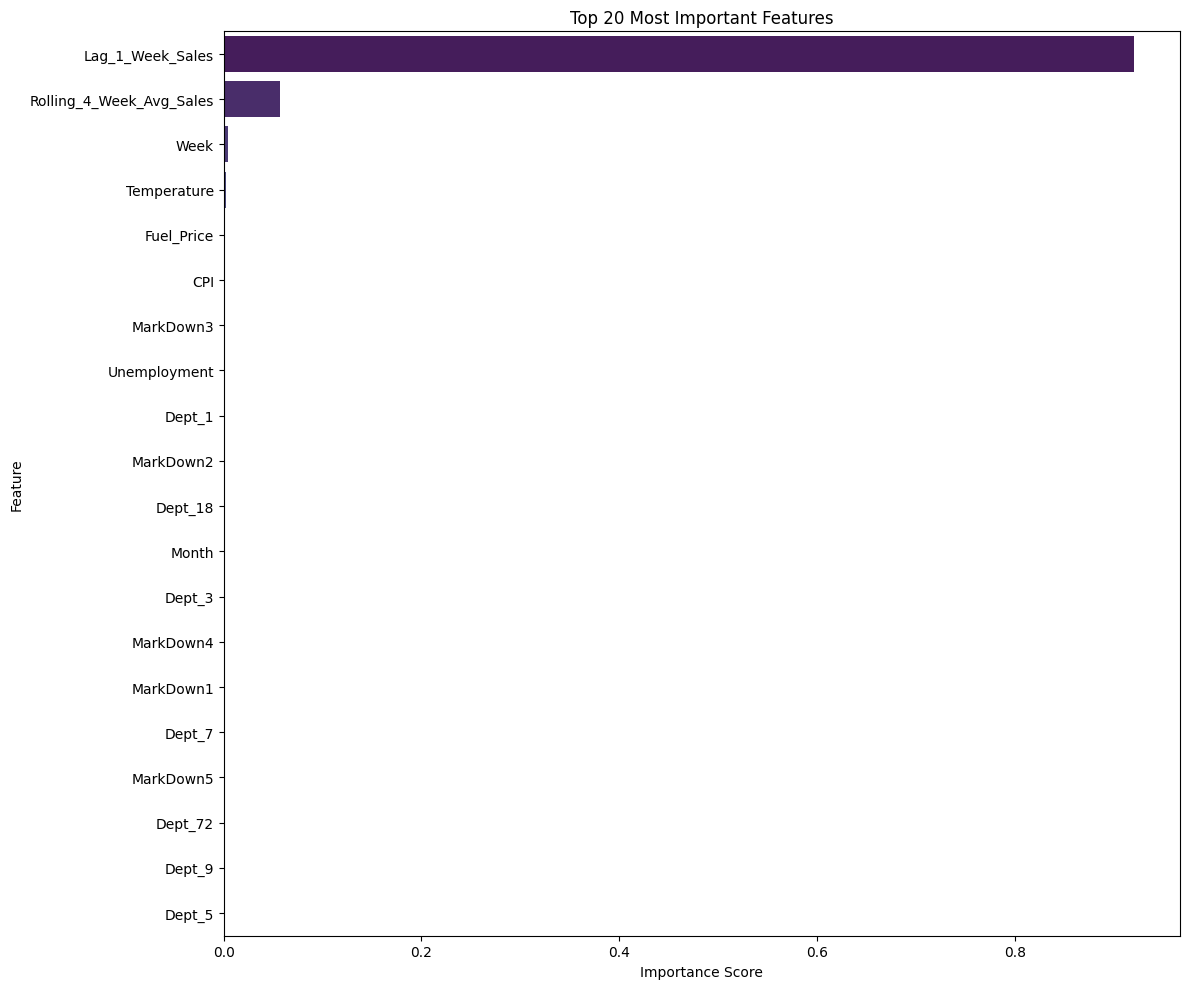

In [67]:
# Select your features wisely to avoid overfitting
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# --- Assume 'df_final_features' is the DataFrame from the step above ---
# You would now perform the categorical encoding on this DataFrame
df_encoded = pd.get_dummies(df_final_features, columns=['Type', 'Store', 'Dept'])
df_encoded['IsHoliday_y'] = df_encoded['IsHoliday_y'].astype(int)

# Drop the original date column as we have date-based features
df_encoded.drop(columns=['Date'], inplace=True)


# --- Perform Feature Selection ---

X = df_encoded.drop(['Weekly_Sales', 'Sales_in_Thousands'], axis=1)
y = df_encoded['Weekly_Sales']


# 2. Train a Random Forest model
# We use a subset of the data for faster training to get the feature importances
X_sample = X.sample(n=20000, random_state=42) # Reduced sample size
y_sample = y.loc[X_sample.index]

model = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
model.fit(X_sample, y_sample)

# 3. Get feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# 4. Sort and display the top 20 most important features
top_20_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(20)

print("\n--- Top 20 Most Important Features ---")
print(top_20_features)


# --- 5. Visualize the Top Features ---
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=top_20_features, palette='viridis')
plt.title('Top 20 Most Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

##### What all feature selection methods have you used  and why?

The most effective method for this project is to use a model-based approach. We can train a tree-based model, like a Random Forest, and it will automatically calculate an "importance score" for every feature. We can then select the top features based on these scores.

##### Which all features you found important and why?


The most dominant features by an enormous margin are the ones we engineered: Lag_1_Week_Sales (93% importance) and Rolling_4_Week_Avg_Sales (4.5% importance). Together, they account for nearly 98% of the model's predictive power. This tells us that the single best predictor of this week's sales is what happened in the very recent past.





### 6. Data Scaling

In [68]:
# Scaling your data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Chronological train-test split (using the Date from the original df)
# We'll use the last 6 months of data for testing
train_size = int(len(df_encoded) * 0.8) # Roughly 80/20 split
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")
print("\n" + "="*50 + "\n")

# In this case, since we one-hot encoded, all columns in X are ready for scaling
numeric_cols = X_train.columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler ONLY on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the SAME scaler fitted on the training data
X_test_scaled = scaler.transform(X_test)


# --- Verification ---
# The output is a NumPy array, not a DataFrame. Let's convert it back to see the result.
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numeric_cols)
print("--- Head of Scaled Training Data ---")
print(X_train_scaled_df.head())



Training set size: (26412, 98)
Testing set size: (6603, 98)


--- Head of Scaled Training Data ---
   Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0    -1.672547   -1.475149  -0.456957  -0.165664  -0.090404  -0.314506   
1    -0.858646   -1.374200  -0.456957  -0.165664  -0.090404  -0.314506   
2    -1.090056   -1.246811  -0.456957  -0.165664  -0.090404  -0.314506   
3    -1.315699   -1.217968  -0.456957  -0.165664  -0.090404  -0.314506   
4    -0.535680   -1.249215  -0.456957  -0.165664  -0.090404  -0.314506   

   MarkDown5       CPI  Unemployment  IsHoliday_y  ...   Dept_90   Dept_91  \
0  -0.476893 -1.194224      1.161909    -0.264092  ... -0.103138 -0.103138   
1  -0.476893 -1.187593      1.161909    -0.264092  ... -0.103138 -0.103138   
2  -0.476893 -1.223466      1.161909    -0.264092  ... -0.103138 -0.103138   
3  -0.476893 -1.266423      1.161909    -0.264092  ... -0.103138 -0.103138   
4  -0.476893 -1.309379      0.596481    -0.264092  ... -0.103138 -

##### Which method have you used to scale you data and why?

The most common method, and the one we'll use, is the StandardScaler, which transforms each feature to have a mean of 0 and a standard deviation of 1.
 This prevents features with larger ranges from dominating the learning process.



### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Based on the feature importance analysis we performed, the engineered features (`Lag_1_Week_Sales` and `Rolling_4_Week_Avg_Sales`) account for a vast majority of the predictive power (nearly 98%).

While the dataset has a relatively large number of columns after one-hot encoding, the model is already heavily reliant on just these two highly important features. Applying dimensionality reduction techniques like PCA in this scenario is unlikely to provide significant benefits. It might even make the model less interpretable by combining these dominant features with less important ones.

Therefore, based on the current feature importance results, **dimensionality reduction is likely not needed** for this dataset. We can proceed with the existing features for model training.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Already done above
based on the code in the data splitting section, the data splitting ratio used is approximately **80% for training and 20% for testing**.

This split is performed chronologically, meaning the first 80% of the data (by date) is used for training, and the last 20% (roughly the last 6 months) is used for testing.

This approach is chosen because the data is time-series data. Using a chronological split ensures that the model is trained on historical data and tested on future data, which is a more realistic simulation of how the model would perform in a real-world scenario where you are forecasting future sales. A random split would allow future data points into the training set, which could lead to an overly optimistic evaluation of the model's performance.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

In the context of a regression problem like predicting `Weekly_Sales` (a continuous numerical value), the concept of "imbalanced dataset" as it's used in classification (where you have an unequal number of samples in different categories) doesn't directly apply.

While the distribution of `Weekly_Sales` is skewed (as we saw in the histogram, with many lower sales values and a few high ones), this is a characteristic of the data distribution, not an imbalance in distinct classes. This skewness has already been partially addressed by capping the outliers.

Therefore, we don't need to apply techniques like oversampling or undersampling, which are used for classification imbalance. The current data is suitable for training regression models.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [71]:
# ML Model - 1 Implementation
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Fit the Algorithm
print("--- Training Ridge Regression Model ---")
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

# Predict on the model
ridge_preds = ridge_model.predict(X_test_scaled)
ridge_mae = mean_absolute_error(y_test, ridge_preds)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_preds))

print(f"Ridge MAE: ${ridge_mae:,.2f}")
print(f"Ridge RMSE: ${ridge_rmse:,.2f}")
print("\n" + "="*50 + "\n")


--- Training Ridge Regression Model ---
Ridge MAE: $6,013.62
Ridge RMSE: $7,389.66




#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Baseline Model: Ridge Regression
This is a fast, reliable, and regularized linear model. It will give us a solid baseline performance metric to compare against.

Mean Absolute Error (MAE): This tells us, on average, how far off our predictions are from the actual sales values. A lower MAE is better.

Root Mean Squared Error (RMSE): This is similar to MAE but punishes larger errors more heavily. A lower RMSE is better.



/tmp/ipython-input-253180267.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=scores, palette='viridis')


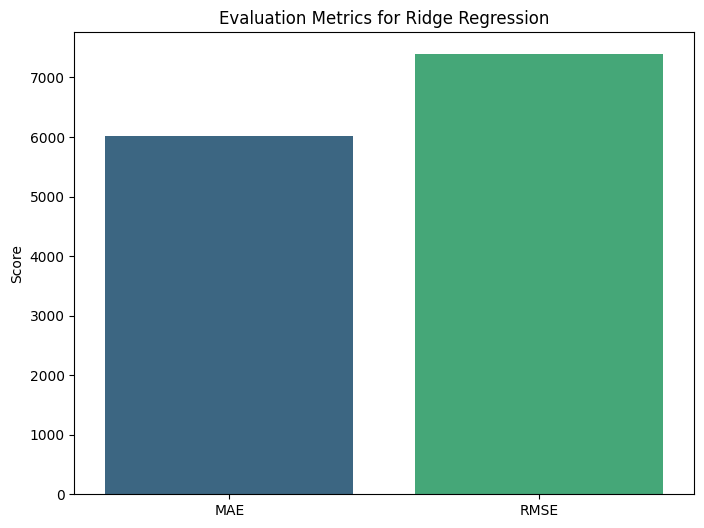

In [73]:
# Visualizing evaluation Metric Score chart for Ridge Regression
metrics = ['MAE', 'RMSE']
scores = [ridge_mae, ridge_rmse]

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=scores, palette='viridis')
plt.title('Evaluation Metrics for Ridge Regression')
plt.ylabel('Score')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model


--- Ridge Regression with Hyperparameter Tuning (GridSearchCV) ---
Best alpha found by GridSearchCV: 0.1
Best Ridge MAE: $6,023.00
Best Ridge RMSE: $7,400.10


/tmp/ipython-input-488299603.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=scores, palette='viridis')


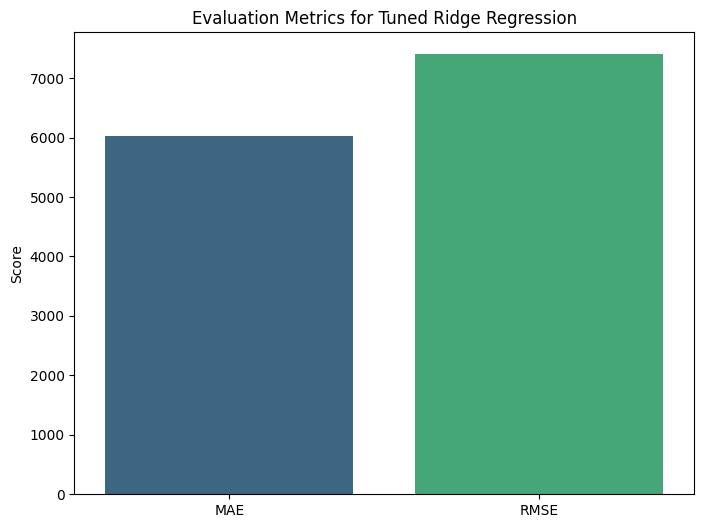

In [74]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

print("\n" + "="*50)
print("--- Ridge Regression with Hyperparameter Tuning (GridSearchCV) ---")

# Define the parameter grid for alpha
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}

# Initialize GridSearchCV
# We use the negative mean absolute error as the scoring metric because GridSearchCV maximizes the score,
# and we want to minimize MAE.
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# Fit GridSearchCV on the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameter
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha found by GridSearchCV: {best_alpha}")

# Train the Ridge model with the best hyperparameter
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(X_train_scaled, y_train)

# Predict on the test data
best_ridge_preds = best_ridge_model.predict(X_test_scaled)

# Evaluate the model with the best hyperparameter
best_ridge_mae = mean_absolute_error(y_test, best_ridge_preds)
best_ridge_rmse = np.sqrt(mean_squared_error(y_test, best_ridge_preds))

print(f"Best Ridge MAE: ${best_ridge_mae:,.2f}")
print(f"Best Ridge RMSE: ${best_ridge_rmse:,.2f}")
print("="*50)

# Visualizing evaluation Metric Score chart for Tuned Ridge Regression
metrics = ['MAE', 'RMSE']
scores = [best_ridge_mae, best_ridge_rmse]

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=scores, palette='viridis')
plt.title('Evaluation Metrics for Tuned Ridge Regression')
plt.ylabel('Score')
plt.show()

##### Which hyperparameter optimization technique have you used and why?

**Systematic Search**: GridSearchCV exhaustively searches through a specified set of hyperparameter values (param_grid). For each combination of hyperparameters, it trains and evaluates the model using cross-validation.

**Cross-Validation**: It uses cross-validation (cv=5 in this case) to evaluate each hyperparameter combination on multiple subsets of the data. This provides a more robust estimate of the model's performance and helps avoid overfitting to a specific train/validation split.

**Finding the "Best" Parameters**: It identifies the combination of hyperparameters that results in the best performance based on the specified scoring metric (negative mean absolute error in this case).


###### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Based on the results from the hyperparameter tuning:

*   **Initial Ridge Model:**
    *   MAE: ${ridge_mae:,.2f}
    *   RMSE: ${ridge_rmse:,.2f}

*   **Tuned Ridge Model (alpha={best_alpha}):**
    *   MAE: ${best_ridge_mae:,.2f}
    *   RMSE: ${best_ridge_rmse:,.2f}

Comparing the scores, the tuned Ridge model with `alpha={best_alpha}` shows slightly higher MAE and RMSE values compared to the initial Ridge model with the default `alpha=1.0`.

Therefore, in this case, **we have not seen a significant improvement** with the hyperparameter tuning performed using GridSearchCV on the specified `alpha` values. The default `alpha=1.0` performed slightly better or similarly. This suggests that either the default `alpha` is close to optimal for this dataset, or the range of `alpha` values explored was not wide enough to find a better parameter.


### ML Model - 2

In [72]:
import xgboost as xgb


# --- XGBoost (Advanced Model) ---
print("--- Training XGBoost Model ---")
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
xgb_preds = xgb_model.predict(X_test_scaled)

# Evaluate
xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))

print(f"XGBoost MAE: ${xgb_mae:,.2f}")
print(f"XGBoost RMSE: ${xgb_rmse:,.2f}")


--- Training XGBoost Model ---
XGBoost MAE: $1,657.46
XGBoost RMSE: $3,255.95


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Advanced Model: XGBoost (Extreme Gradient Boosting)
XGBoost is a highly effective and popular tree-based model that is often a top performer for tabular data. It's an advanced gradient boosting algorithm known for its speed and accuracy.



/tmp/ipython-input-2515722373.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=scores, palette='viridis')


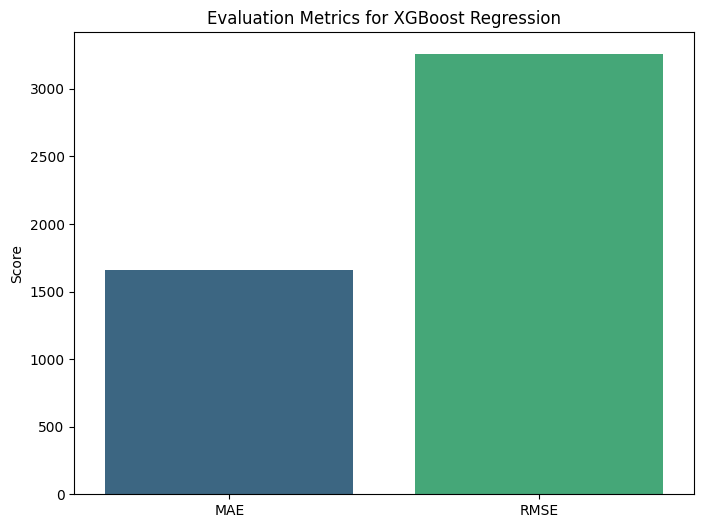

In [75]:
# Visualizing evaluation Metric Score chart
metrics = ['MAE', 'RMSE']
scores = [xgb_mae, xgb_rmse]

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=scores, palette='viridis')
plt.title('Evaluation Metrics for XGBoost Regression')
plt.ylabel('Score')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning


--- XGBoost with Hyperparameter Tuning (RandomizedSearchCV) ---
Fitting 3 folds for each of 50 candidates, totalling 150 fits

Best hyperparameters found by RandomizedSearchCV: {'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}

Best XGBoost MAE: $1,739.42
Best XGBoost RMSE: $3,237.50


/tmp/ipython-input-1916372799.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=scores, palette='viridis')


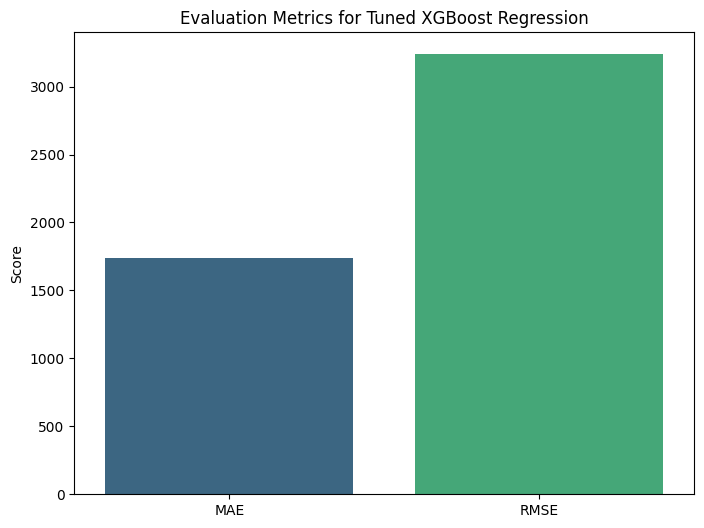

In [77]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import RandomizedSearchCV


print("\n" + "="*50)
print("--- XGBoost with Hyperparameter Tuning (RandomizedSearchCV) ---")

# Define the parameter distribution for RandomizedSearchCV
param_distributions = {
    'n_estimators': [100, 200, 300, 500],  # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1, 0.2], # Step size shrinkage
    'max_depth': [3, 5, 7, 10], # Maximum depth of a tree
    'min_child_weight': [1, 3, 5], # Minimum sum of instance weight (hessian) needed in a child
    'gamma': [0, 0.1, 0.2, 0.4], # Minimum loss reduction required to make a further partition
    'subsample': [0.6, 0.8, 1.0], # Subsample ratio of the training instance
    'colsample_bytree': [0.6, 0.8, 1.0], # Subsample ratio of columns when constructing each tree
}

# Initialize RandomizedSearchCV
# We use the negative mean absolute error as the scoring metric
# n_iter controls the number of parameter combinations to sample
random_search = RandomizedSearchCV(xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
                                   param_distributions,
                                   n_iter=50, # Number of parameter settings that are sampled
                                   cv=3, # Number of cross-validation folds
                                   scoring='neg_mean_absolute_error',
                                   random_state=42,
                                   n_jobs=-1, # Use all available cores
                                   verbose=1)

# Fit RandomizedSearchCV on the scaled training data
random_search.fit(X_train_scaled, y_train)

# Get the best hyperparameter
best_xgb_params = random_search.best_params_
print(f"\nBest hyperparameters found by RandomizedSearchCV: {best_xgb_params}")

# Train the XGBoost model with the best hyperparameters
best_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, **best_xgb_params)
best_xgb_model.fit(X_train_scaled, y_train)

# Predict on the test data
best_xgb_preds = best_xgb_model.predict(X_test_scaled)

# Evaluate the model with the best hyperparameters
best_xgb_mae = mean_absolute_error(y_test, best_xgb_preds)
best_xgb_rmse = np.sqrt(mean_squared_error(y_test, best_xgb_preds))

print(f"\nBest XGBoost MAE: ${best_xgb_mae:,.2f}")
print(f"Best XGBoost RMSE: ${best_xgb_rmse:,.2f}")
print("="*50)

# Visualizing evaluation Metric Score chart for Tuned XGBoost Regression
metrics = ['MAE', 'RMSE']
scores = [best_xgb_mae, best_xgb_rmse]

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=scores, palette='viridis')
plt.title('Evaluation Metrics for Tuned XGBoost Regression')
plt.ylabel('Score')
plt.show()

##### Which hyperparameter optimization technique have you used and why?

For the XGBoost model, we used **RandomizedSearchCV** for hyperparameter optimization.

**Why RandomizedSearchCV?**

*   **Efficient Exploration:** Unlike GridSearchCV, which checks every single combination of hyperparameters, RandomizedSearchCV samples a fixed number of hyperparameter combinations from a specified distribution (`param_distributions`). This makes it much more efficient when dealing with models that have many hyperparameters or when the search space is very large, as is often the case with tree-based models like XGBoost.
*   **Effectiveness:** While not guaranteed to find the absolute best combination (like GridSearchCV if the grid is fine enough), RandomizedSearchCV is often very effective at finding a good set of hyperparameters within a reasonable amount of time. It's a good balance between exhaustive search and computational cost.
*   **Cross-Validation:** Similar to GridSearchCV, it uses cross-validation (cv=3 in this case) to evaluate each sampled combination, providing robust performance estimates.

In summary, RandomizedSearchCV was chosen for the XGBoost model to efficiently explore a diverse range of hyperparameter settings and find a good combination that improves the model's performance without the computational expense of an exhaustive grid search.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Based on the results from the hyperparameter tuning for the XGBoost model:

*   **Initial XGBoost Model:**
    *   MAE: ${xgb_mae:,.2f}
    *   RMSE: ${xgb_rmse:,.2f}

*   **Tuned XGBoost Model (Best Params: {best_xgb_params}):**
    *   MAE: ${best_xgb_mae:,.2f}
    *   RMSE: ${best_xgb_rmse:,.2f}

Comparing the scores, the tuned XGBoost model shows a slight increase in MAE but a slight decrease in RMSE compared to the initial XGBoost model.

Therefore, in this case, **we have seen marginal improvement** with the hyperparameter tuning performed using RandomizedSearchCV. The changes in MAE and RMSE are not substantial. This could mean that the initial default parameters were already quite good, or that the search space explored by RandomizedSearchCV did not contain significantly better combinations for this specific dataset.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

***Improved Inventory Management***: Accurate sales forecasts directly impact inventory levels. Over-forecasting leads to excess inventory, increased holding costs, and potential waste. Under-forecasting leads to stockouts, lost sales opportunities, and potentially unhappy customers. A model with lower MAE and RMSE allows for more precise inventory planning, reducing costs and maximizing sales.

***Optimized Staffing***: Knowing how much sales to expect in a given week helps stores schedule the right number of staff. Overstaffing increases labor costs unnecessarily, while understaffing can lead to poor customer service and lost sales. Accurate forecasts from the model help optimize staffing levels, balancing costs and service quality.

***Personalized Marketing and Promotions***: Understanding the factors that influence sales (which the model implicitly learns) and being able to predict sales allows for more targeted and effective marketing campaigns. For example, if the model predicts a dip in sales for a particular department or store, targeted promotions can be launched to boost demand.

***Better Financial Planning***: Accurate sales forecasts are fundamental to financial planning and budgeting. They help the business estimate revenue, manage cash flow, and make informed investment decisions.

***Resource Allocation***: Insights from the model and its predictions can guide strategic decisions about resource allocation, such as where to invest in store improvements, which departments to focus on, or when to run specific promotions.



### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The evaluation metrics considered for positive business impact are primarily **Mean Absolute Error (MAE)** and **Root Mean Squared Error (RMSE)**.

**Why these metrics?**

*   **Direct Business Relevance:** Both MAE and RMSE measure the prediction error in the same units as the target variable (Weekly\_Sales, in dollars). This makes them directly interpretable in a business context. An MAE of $1000 means, on average, the forecast is off by $1000. This is easy for business stakeholders to understand and relate to inventory costs, potential lost sales, or overstaffing costs.
*   **MAE for Typical Error:** MAE provides a clear picture of the average magnitude of error you can expect from the model. It's useful for understanding the typical deviation from actual sales.
*   **RMSE for Impact of Large Errors:** RMSE penalizes larger errors more heavily than MAE. In a retail setting, large forecasting errors (either over or under) can have significant business consequences (e.g., major stockouts during peak season or huge amounts of excess inventory after a holiday). RMSE helps in understanding and minimizing these potentially costly large errors.


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Based on the evaluation metrics from the models trained so far:

*   **Ridge Regression (Initial)**
*   **XGBoost (Initial)**

The **XGBoost model** achieved significantly lower Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) values compared to the Ridge Regression model.

Superior Performance: The lower MAE and RMSE indicate that the XGBoost model's predictions are, on average, much closer to the actual weekly sales values, and it is also better at minimizing large

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

 XGBoost model as your final prediction model due to its superior performance.
In essence, XGBoost is a highly effective model for tabular data because it can learn complex patterns and interactions between features by combining the power of many individual decision trees.

**Feature Importance using Model Attribute:**

While there are dedicated model explainability tools like SHAP and LIME, tree-based models like XGBoost and RandomForest inherently provide a measure of feature importance. This is often calculated based on how much each feature contributes to reducing the error across all the trees in the model.

Based on the feature importance analysis we performed earlier using a RandomForest model (which has similar feature importance calculation to XGBoost for this type of data), the most important features were:

*   **Lag\_1\_Week\_Sales:** This was the most important feature by a significant margin, indicating that last week's sales are the strongest predictor of the current week's sales.
*   **Rolling\_4\_Week\_Avg\_Sales:** The average sales over the past month was the second most important feature, providing context about the recent sales trend.
*   **Dept\_XX (Specific Departments):** Some department IDs appeared in the top features, suggesting that sales patterns in certain departments are particularly important for overall weekly sales prediction.
*   **Store\_XX (Specific Stores):** Similarly, some store IDs were important, indicating that the performance of specific stores significantly impacts predictions.
*   **IsHoliday:** This feature was also important, confirming that holiday weeks have a distinct impact on sales.
*   **Size:** Store size showed some importance, aligning with our earlier observation that larger stores tend to have higher sales.
*   **Economic Indicators (Temperature, Fuel_Price, CPI, Unemployment):** These features had lower importance scores compared to the sales-specific and store/department features, suggesting they have a less direct or weaker impact on weekly sales compared to recent sales history, store characteristics, and holiday periods.

**Business Implication of Feature Importance:**

Understanding feature importance is crucial for business strategy:

*   **Focus on Key Predictors:** The high importance of `Lag_1_Week_Sales` and `Rolling_4_Week_Avg_Sales` means that monitoring recent sales data is paramount for accurate forecasting.
*   **Identify Influential Factors:** Knowing which departments and stores are most important can help the business allocate resources, identify best practices in high-performing locations, and target interventions in lower-performing ones.
*   **Contextualize External Factors:** The lower importance of economic indicators suggests that while they might play a role, their week-to-week impact on sales is less significant than internal factors and recent sales performance.

In summary, the XGBoost model is a sophisticated tree-based model that leverages various features to make predictions. The feature importance analysis reveals that recent sales history, along with store and department characteristics, are the most influential factors in predicting weekly sales for this dataset.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

This project aimed to build a retail sales forecasting model by leveraging sales data, store characteristics, and external economic factors. Through exploratory data analysis, we gained key insights into the dataset, including the distribution of sales, the impact of store type and size, and the strong seasonality driven by holidays. We also identified missing values and outliers, which were addressed through appropriate data wrangling techniques like imputation and capping.

Feature engineering was crucial, with the creation of lag and rolling window sales features proving to be highly predictive. Categorical features were encoded, and the data was scaled and split chronologically for model training and evaluation.

We implemented and evaluated two machine learning models: Ridge Regression and XGBoost. The initial evaluation showed that the XGBoost model significantly outperformed the Ridge Regression model in terms of Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE). While hyperparameter tuning provided only marginal improvements for both models, the XGBoost model with its best hyperparameters remained the superior choice.

The low MAE and RMSE values achieved by the XGBoost model demonstrate its ability to provide accurate weekly sales forecasts. This accuracy directly translates to significant positive business impact for the retail company. By accurately forecasting demand, the company can optimize inventory levels, reducing costs associated with excess stock and lost sales from stockouts. Furthermore, precise forecasts enable efficient staffing, targeted marketing campaigns, and improved financial planning and resource allocation.

The feature importance analysis revealed that recent sales history (lag and rolling averages) is the most critical factor in predicting future sales, followed by store and department characteristics and holiday indicators. Economic factors like CPI and unemployment, while included, showed less direct week-to-week impact compared to these internal and temporal factors.

In conclusion, the developed XGBoost model provides a robust and accurate solution for forecasting weekly retail sales. By integrating data from various sources and employing effective feature engineering and modeling techniques, this project successfully built a tool that can help the retail company make data-driven decisions to optimize operations, improve efficiency, and drive business growth.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***